In [1]:
import pandas as pd


In [14]:
import matplotlib.pyplot as plt


In [3]:
import numpy as np

In [4]:
Crime_5_7 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv.',na_values = [None, 'NaN','Nothing'], header = 0,error_bad_lines=False) 
Crime_8_11 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv.',na_values = [None, 'NaN','Nothing'], header = 0,error_bad_lines=False) 

Crime_12_17 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv.',na_values = [None, 'NaN','Nothing'], header = 0,error_bad_lines=False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


In [5]:
Crime_Data = [Crime_5_7, Crime_8_11, Crime_12_17]
del Crime_5_7
del Crime_8_11
del Crime_12_17

In [6]:
Crime_Data = pd.concat(Crime_Data,axis = 0) #axis=0 returns a dataframe, rather than a series 

In [7]:
Crime_Data.drop_duplicates(subset=['ID', 'Case Number'], inplace=True) #inplace avoids copies

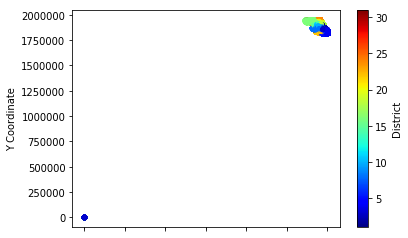

In [8]:
Crime_Data.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', 
                c='District', cmap=plt.get_cmap('jet'))
print()

E:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

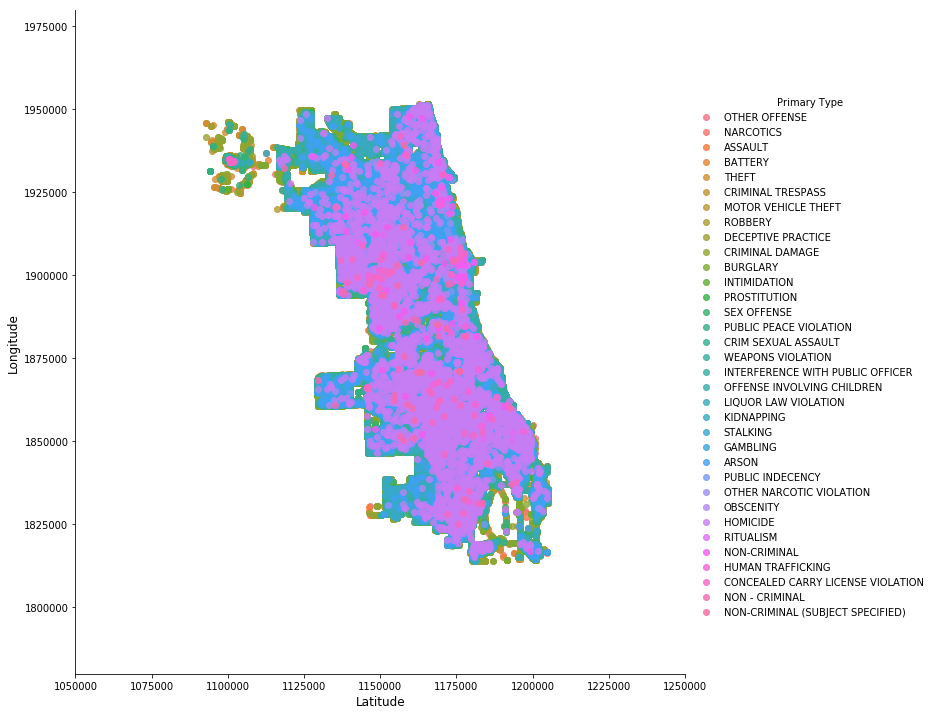

In [9]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, 
           hue='Primary Type', data=Crime_Data, fit_reg=False)
plt.ylim(1780000,1980000)
plt.xlim(1050000,1250000)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

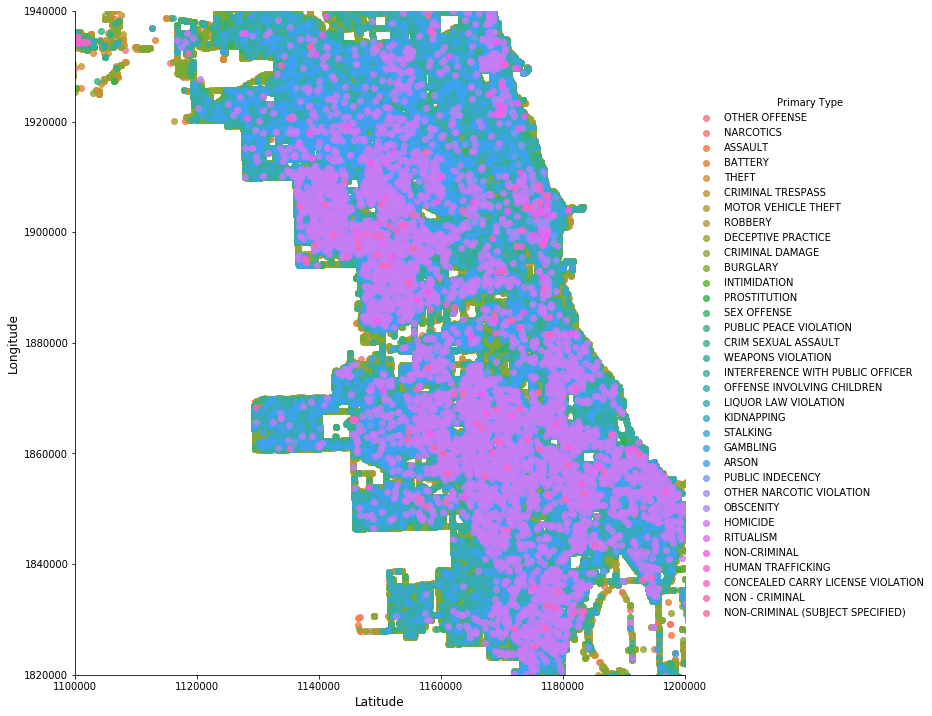

In [10]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='Primary Type', data=Crime_Data, fit_reg=False)
plt.ylim(1820000,1940000)
plt.xlim(1100000,1200000)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

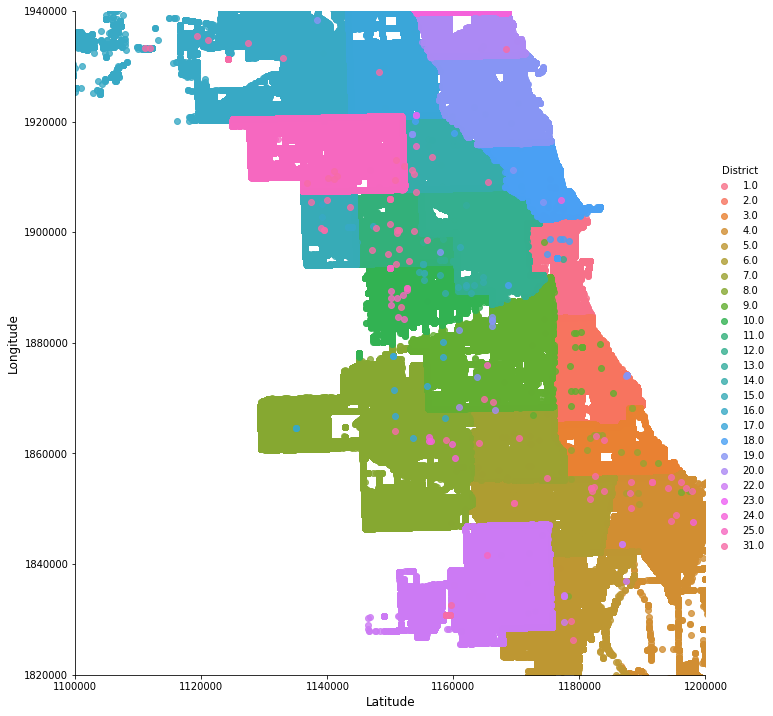

In [11]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='District', data=Crime_Data, fit_reg=False)
plt.ylim(1820000,1940000)
plt.xlim(1100000,1200000)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

E:\Anaconda\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x864 with 0 Axes>

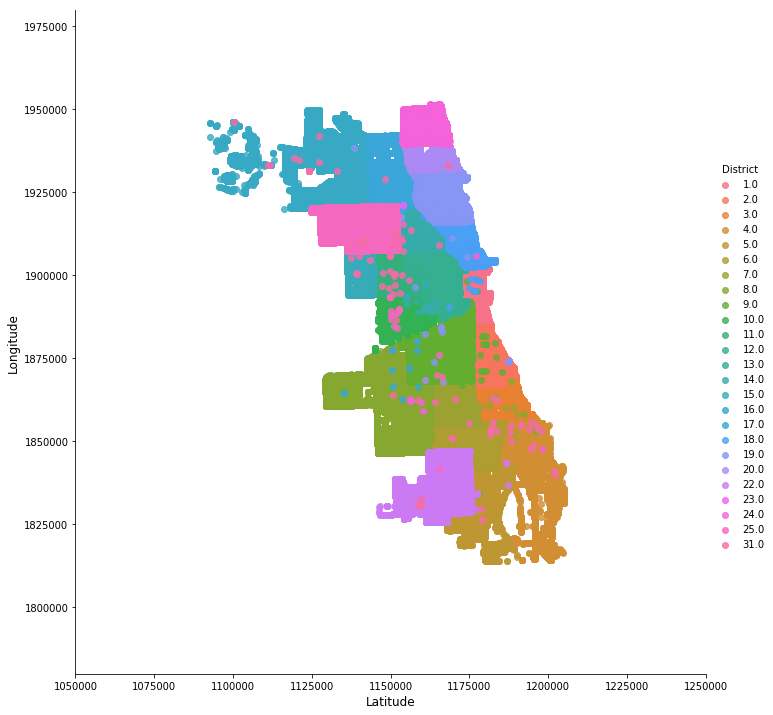

In [12]:
import seaborn as sns
plt.figure(figsize=(12,12))
sns.lmplot(x='X Coordinate', y='Y Coordinate', size=10, hue='District', data=Crime_Data, fit_reg=False)
plt.ylim(1780000,1980000)
plt.xlim(1050000,1250000)
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()

(1750000, 2000000)

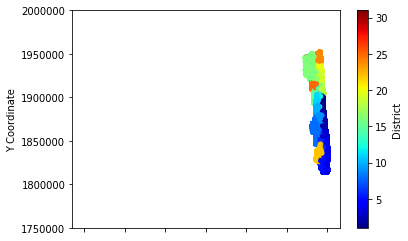

In [15]:
Crime_Data.plot(kind='scatter',x='X Coordinate', y='Y Coordinate', c='District', cmap=plt.get_cmap('jet'))
print()
plt.ylim(1750000,2000000) #extreme coords of chicago(general info)
#plt.xlim(-88,-87.4)

In [16]:
Crime_Data.drop(['Unnamed: 0','Case Number','IUCR','FBI Code','Updated On','Location',
                 'X Coordinate','Y Coordinate','Location'], inplace = True, axis = 1)

In [17]:
Crime_Data.Date = pd.to_datetime(Crime_Data.Date, format = '%m/%d/%Y %I:%M:%S %p')
Crime_Data.index = pd.DatetimeIndex(Crime_Data.Date)

In [18]:
Crime_Data['Primary Type'] = pd.Categorical(Crime_Data['Primary Type']) #categorizes attributes under that particular heading
Crime_Data['Description'] = pd.Categorical(Crime_Data['Description'])
Crime_Data['Location Description'] = pd.Categorical(Crime_Data['Location Description'])

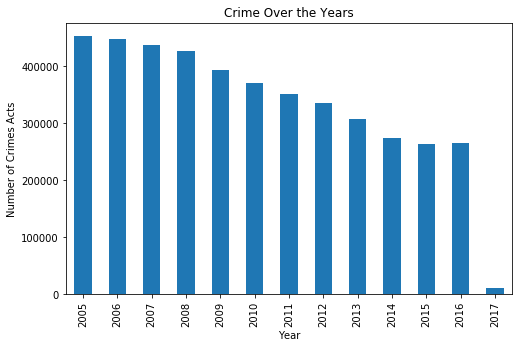

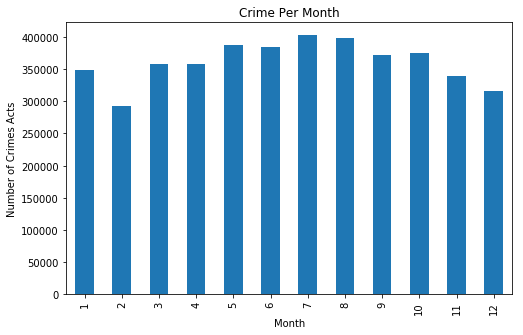

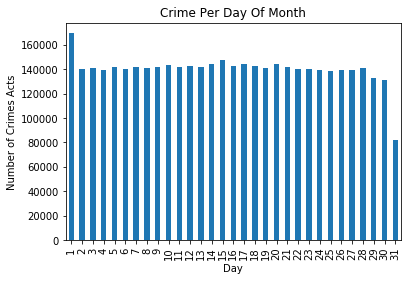

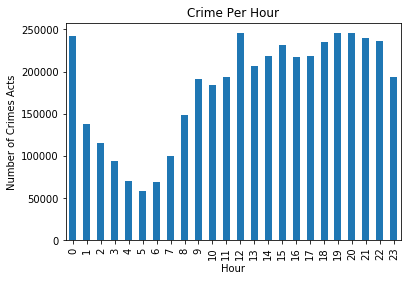

In [19]:
#make graph of crimes per year
plt.figure(figsize = (8,5)) #dimensions
Crime_Data.groupby([Crime_Data.index.year]).size().plot.bar()
plt.title('Crime Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes Acts')
plt.show()
plt.figure(figsize = (8,5))
#make graph of crimes per month
Crime_Data.groupby([Crime_Data.index.month]).size().plot.bar()
plt.title('Crime Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per day
Crime_Data.groupby([Crime_Data.index.day]).size().plot.bar()
plt.title('Crime Per Day Of Month')
plt.xlabel('Day')
plt.ylabel('Number of Crimes Acts')
plt.show()
#graph of crimes per hour
Crime_Data.groupby([Crime_Data.index.hour]).size().plot.bar()
plt.title('Crime Per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Crimes Acts')
plt.show()

In [20]:
Crime_Data_date = Crime_Data.pivot_table('ID', aggfunc = np.size, columns = 'Primary Type', 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_date.index = pd.DatetimeIndex(Crime_Data_date.index)

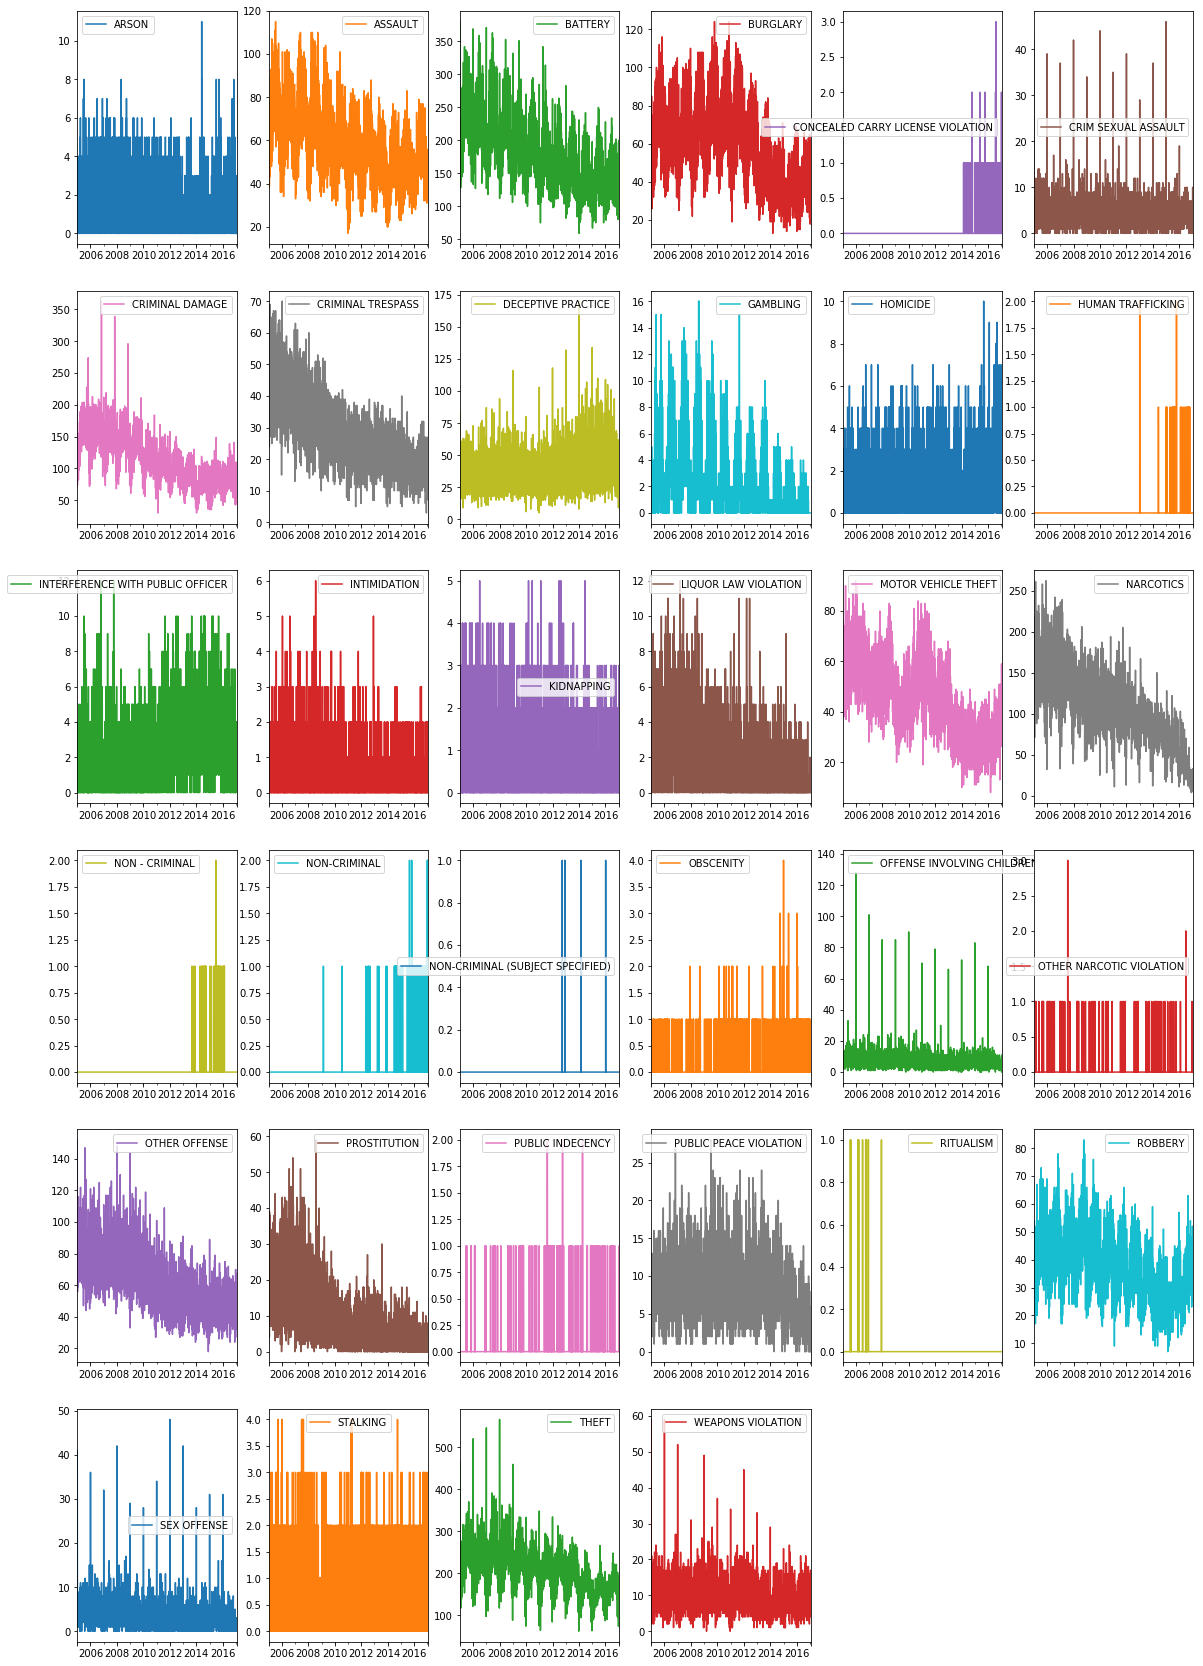

In [21]:
#make graph of different types of crimes per month
Plot = Crime_Data_date.plot(figsize = (20,30), subplots = True, layout = (6,6),
                                  sharex = False, sharey = False)
plt.show()

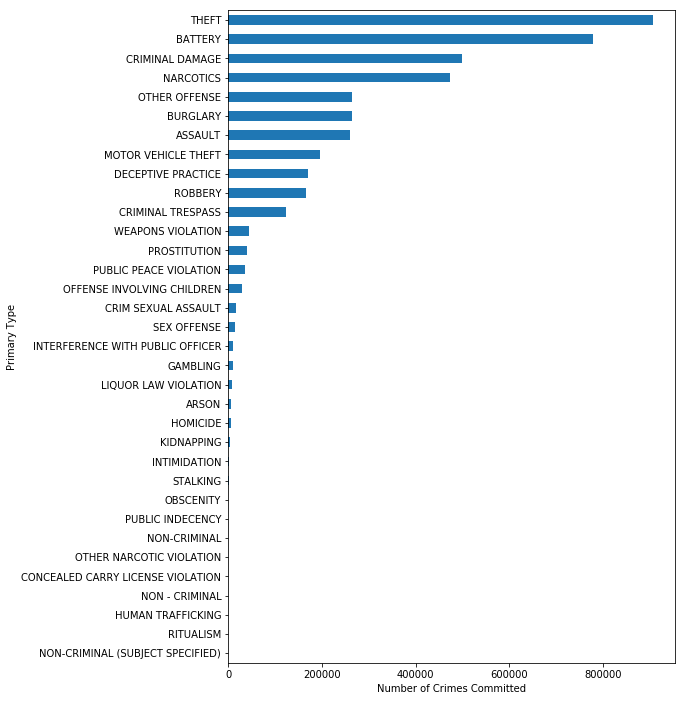

In [22]:
#plot of the relatives amounts of each type of crime
plt.figure(figsize = (8,12))
Crime_Data.groupby(Crime_Data['Primary Type']).size().sort_values(ascending = True).plot(kind = 'barh')
plt.xlabel('Number of Crimes Committed')
plt.show()

In [23]:
#extract year data for each crime, plot using matplotlib for each year the latitude and longitude variables
#make color by Description column
Groups = Crime_Data.groupby(Crime_Data['Primary Type'])
Groups = dict(list(Groups))
Keys = list(Groups.keys())

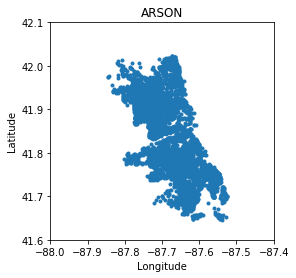

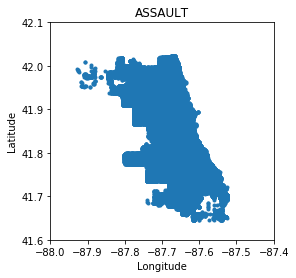

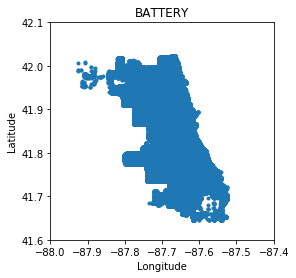

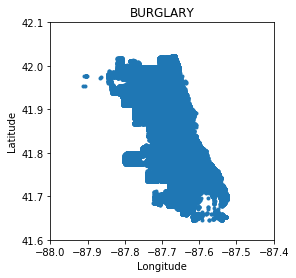

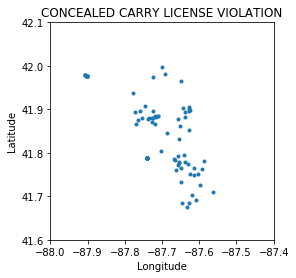

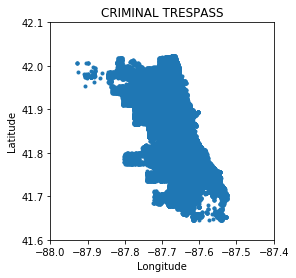

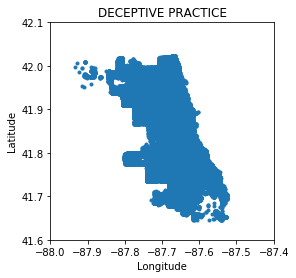

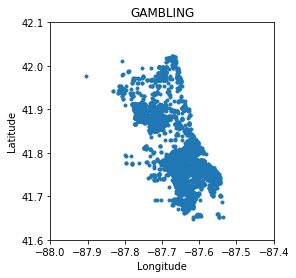

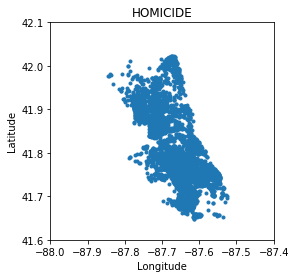

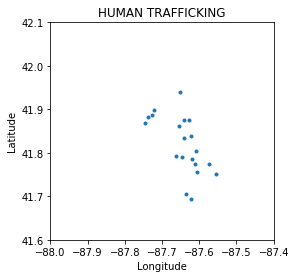

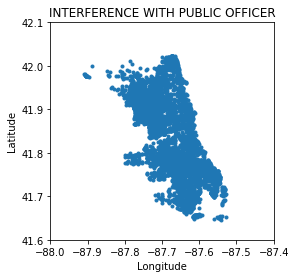

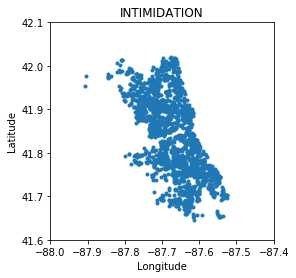

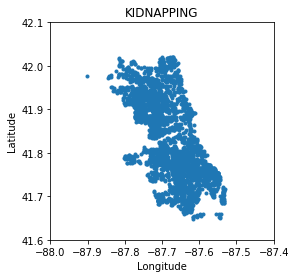

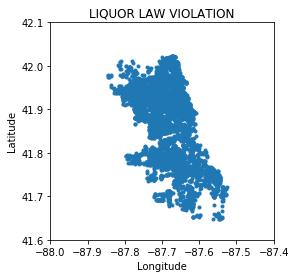

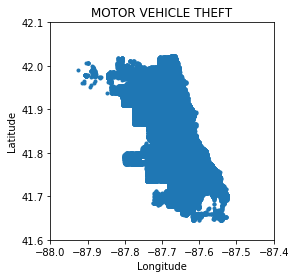

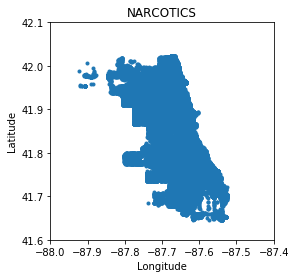

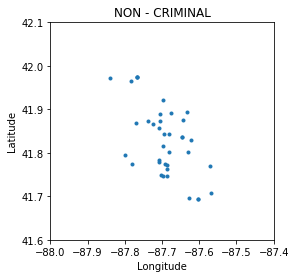

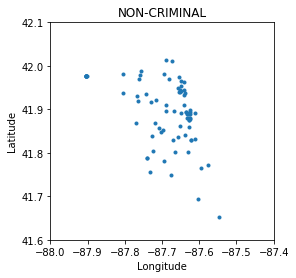

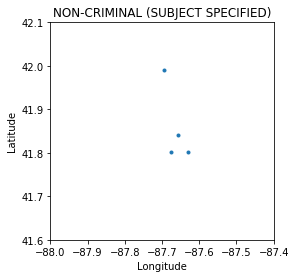

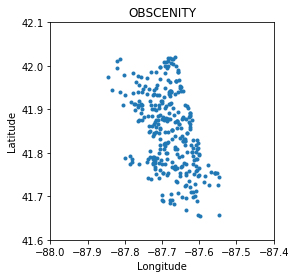

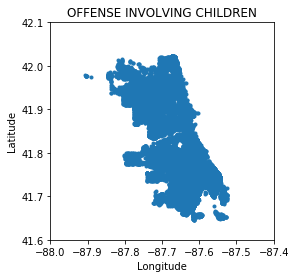

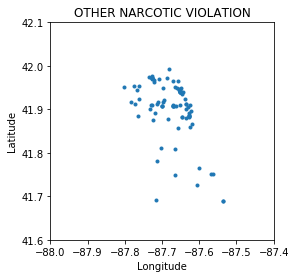

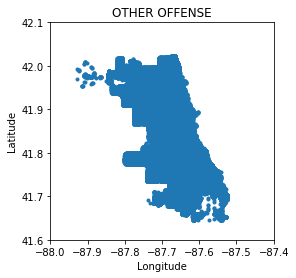

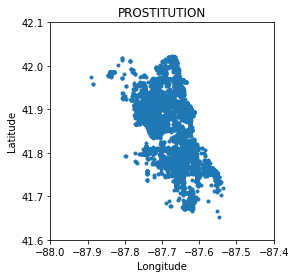

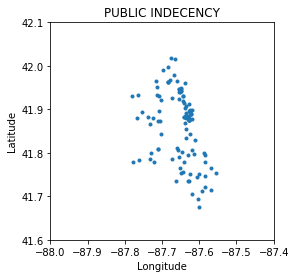

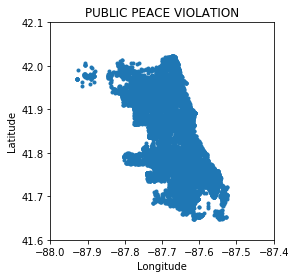

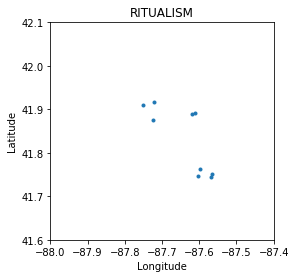

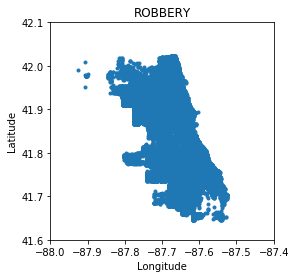

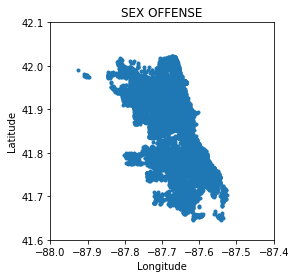

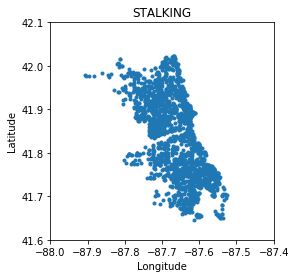

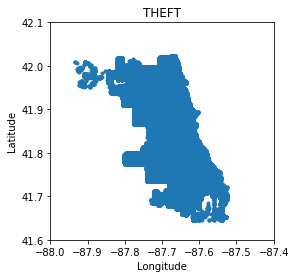

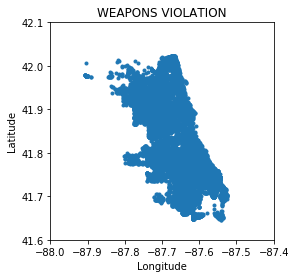

In [24]:
for key in Keys:
    plt.figure(figsize = (4,4))
    plt.scatter(Groups[key].Longitude, Groups[key].Latitude, marker = '.')
    plt.ylim(41.6,42.1) #extreme coords of chicago(general info)
    plt.xlim(-88,-87.4)
    plt.title(key)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [25]:
#Try to predict arrest based on data - NaiveBayes
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
Arrest_Data = Crime_Data.drop('Arrest', axis = 1)
Arrest_Data = Arrest_Data.drop('Date', axis = 1)
Arrest_Data = Arrest_Data.drop('Block', axis = 1)
Arrest_Target = Crime_Data['Arrest']

In [26]:
Arrest_Data['Primary Type'] = (Arrest_Data['Primary Type']).cat.codes
Arrest_Data['Location Description'] = (Arrest_Data['Location Description']).cat.codes
Arrest_Data['Description'] = (Arrest_Data['Description']).cat.codes

In [27]:
#gnb = GaussianNB()
#scores = cross_val_score(gnb, Arrest_Data, Arrest_Target)
#scores.mean()

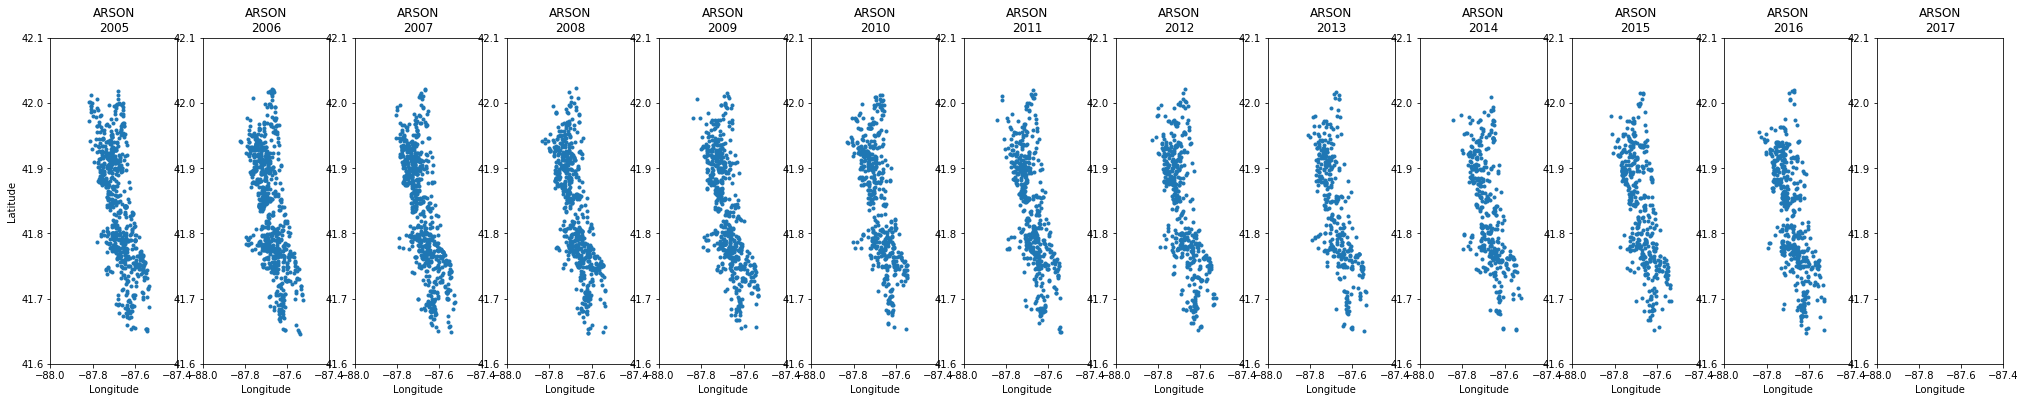

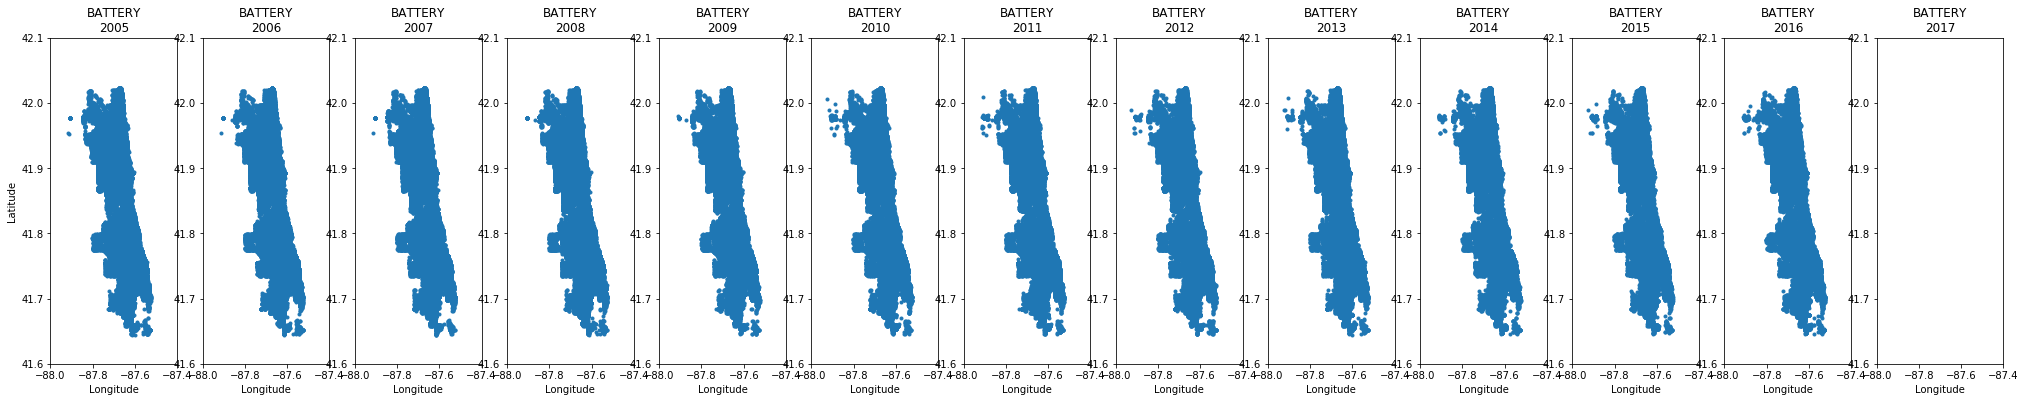

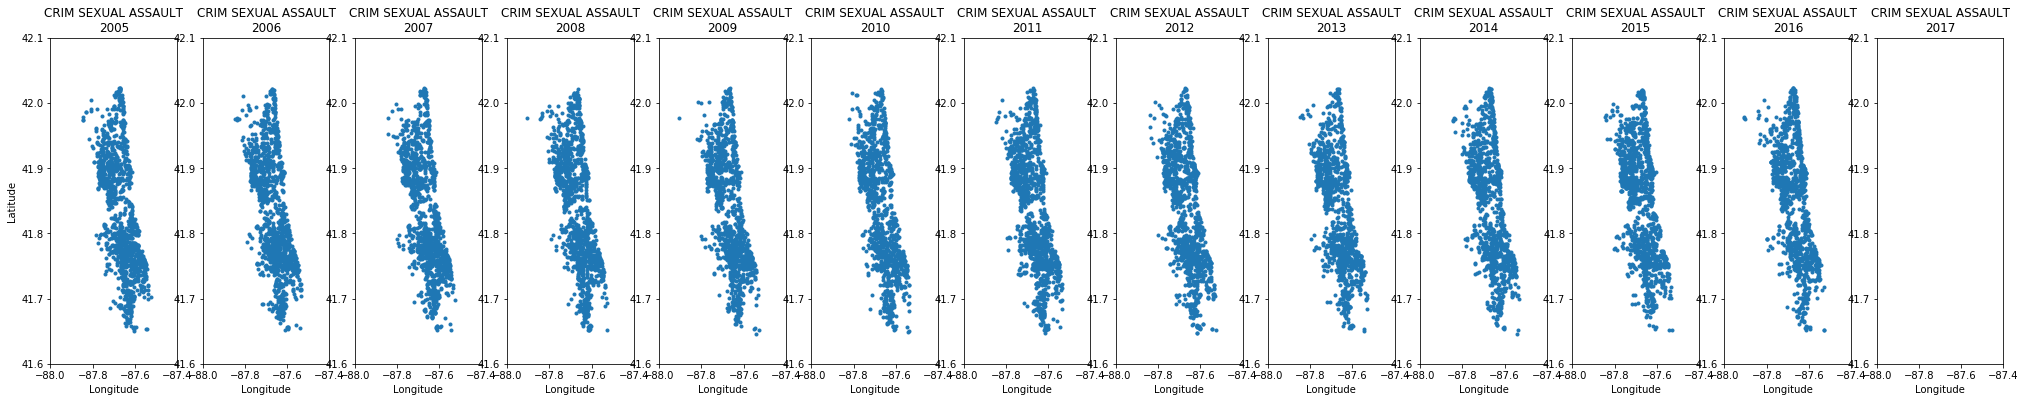

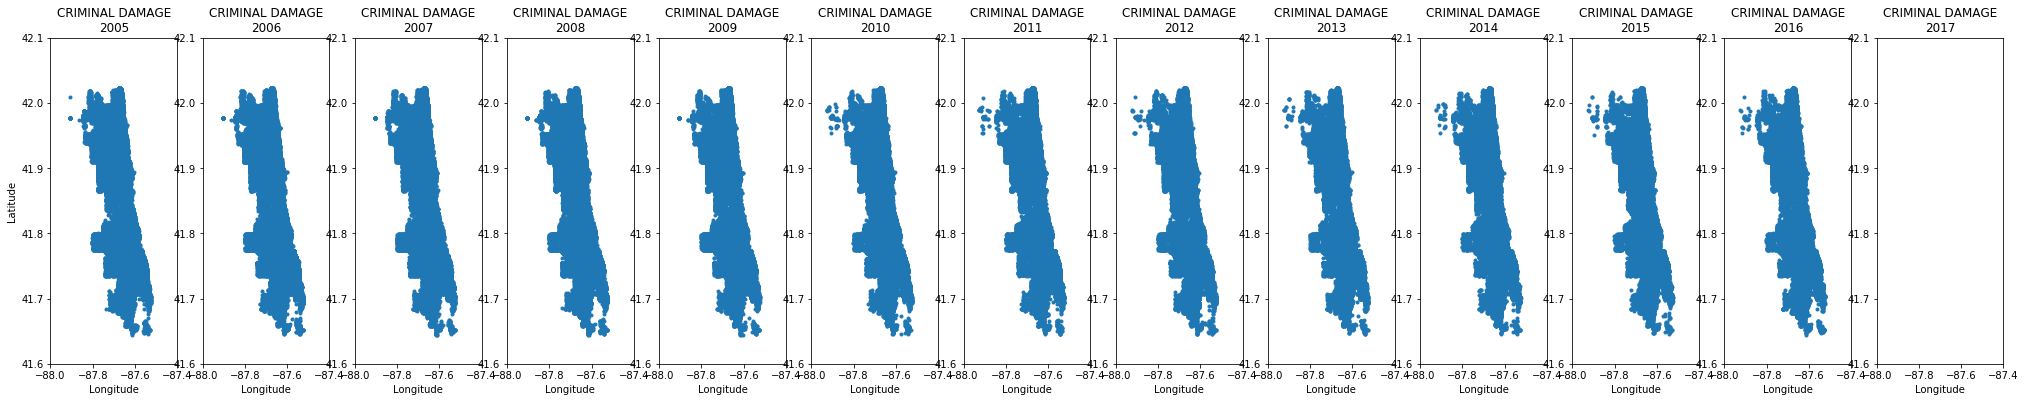

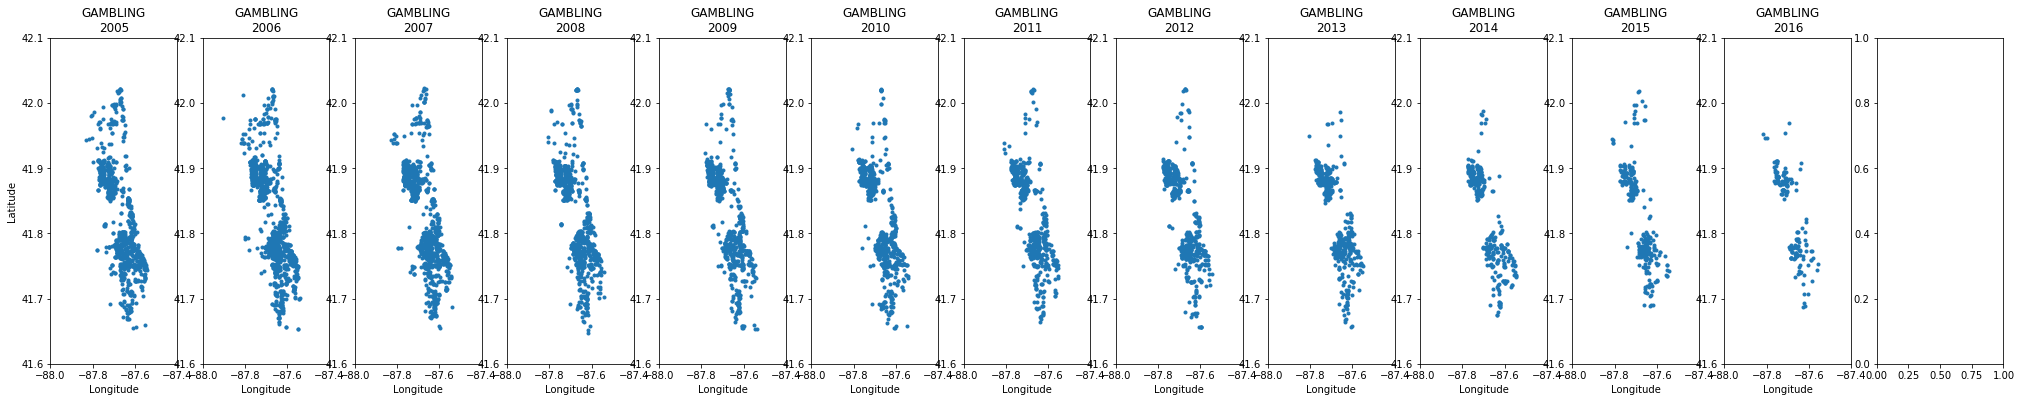

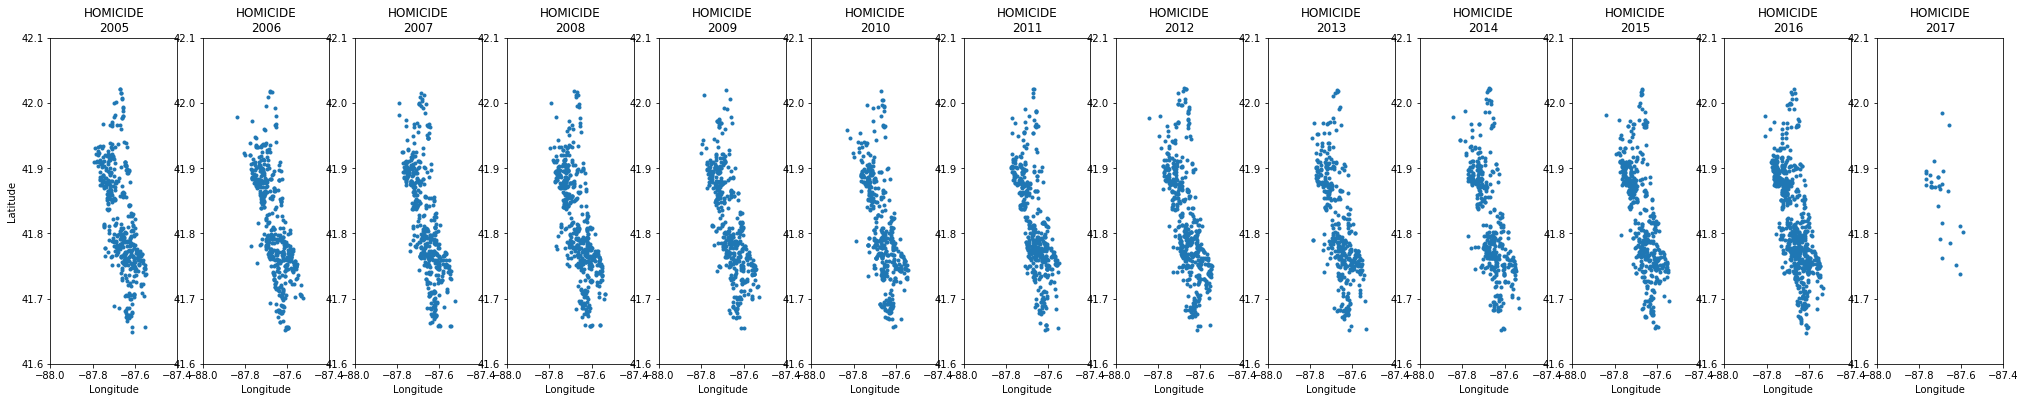

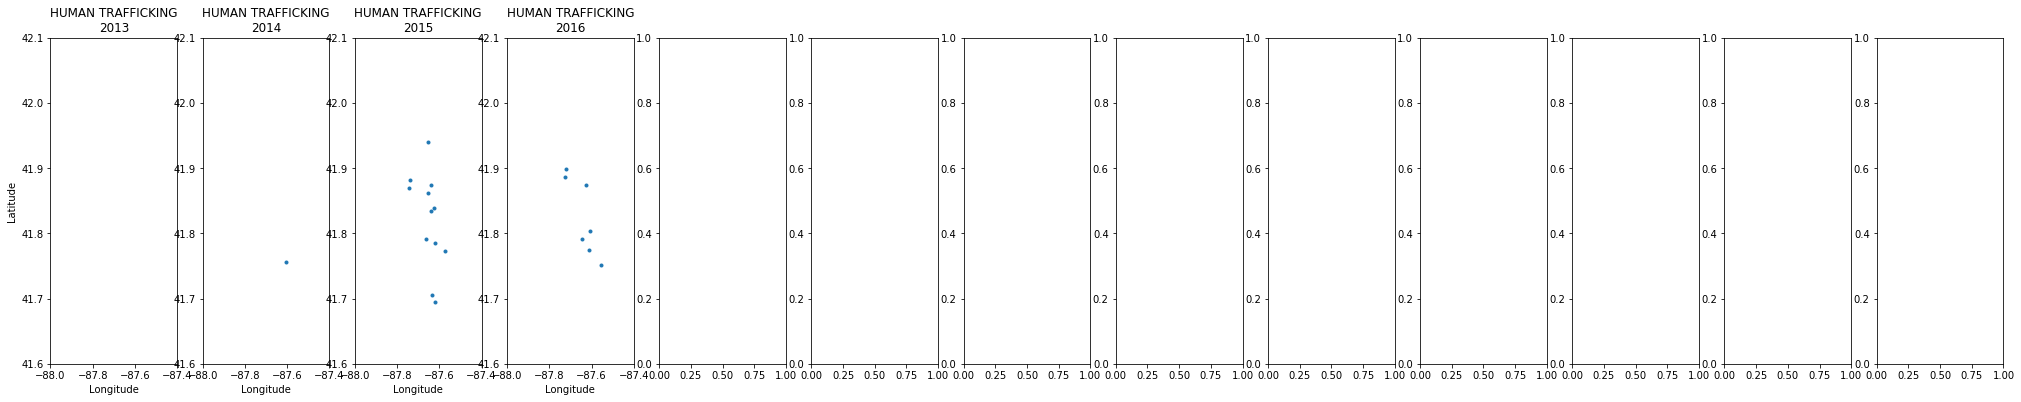

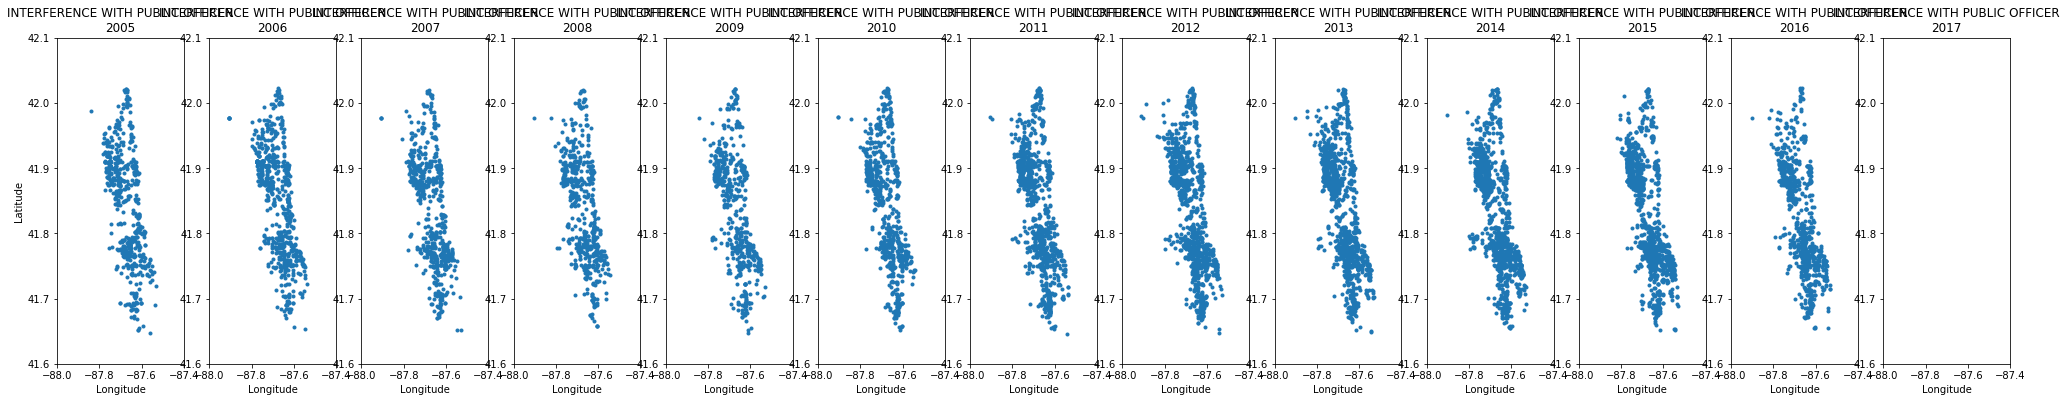

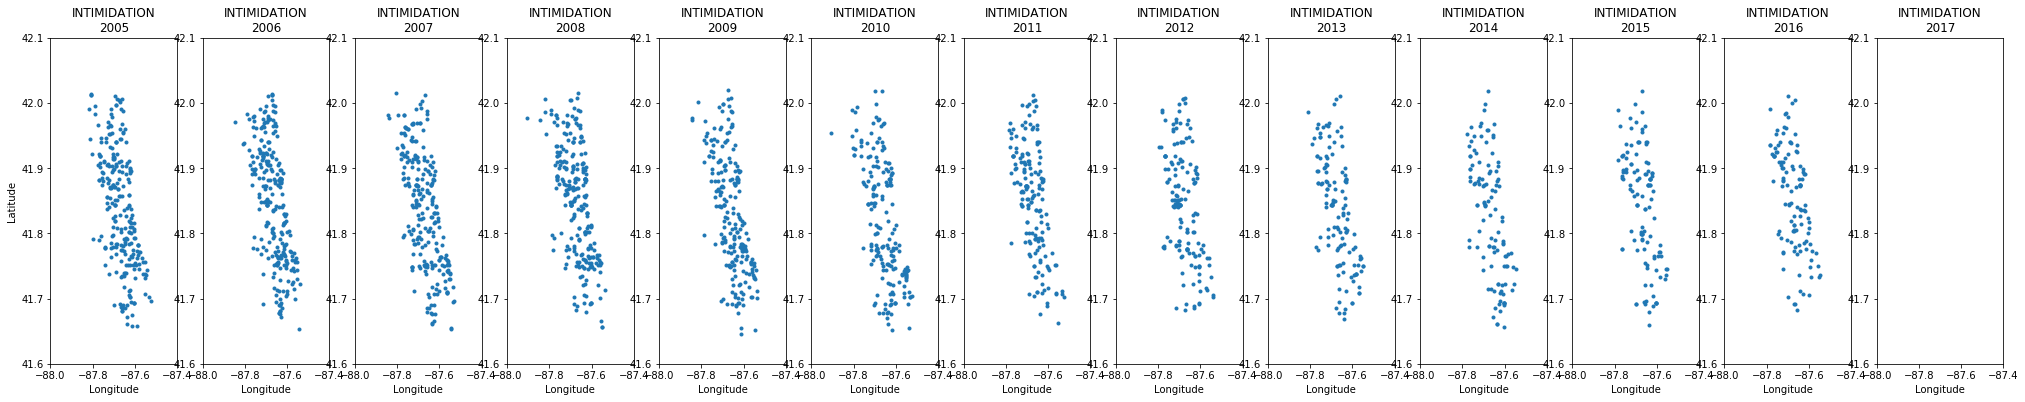

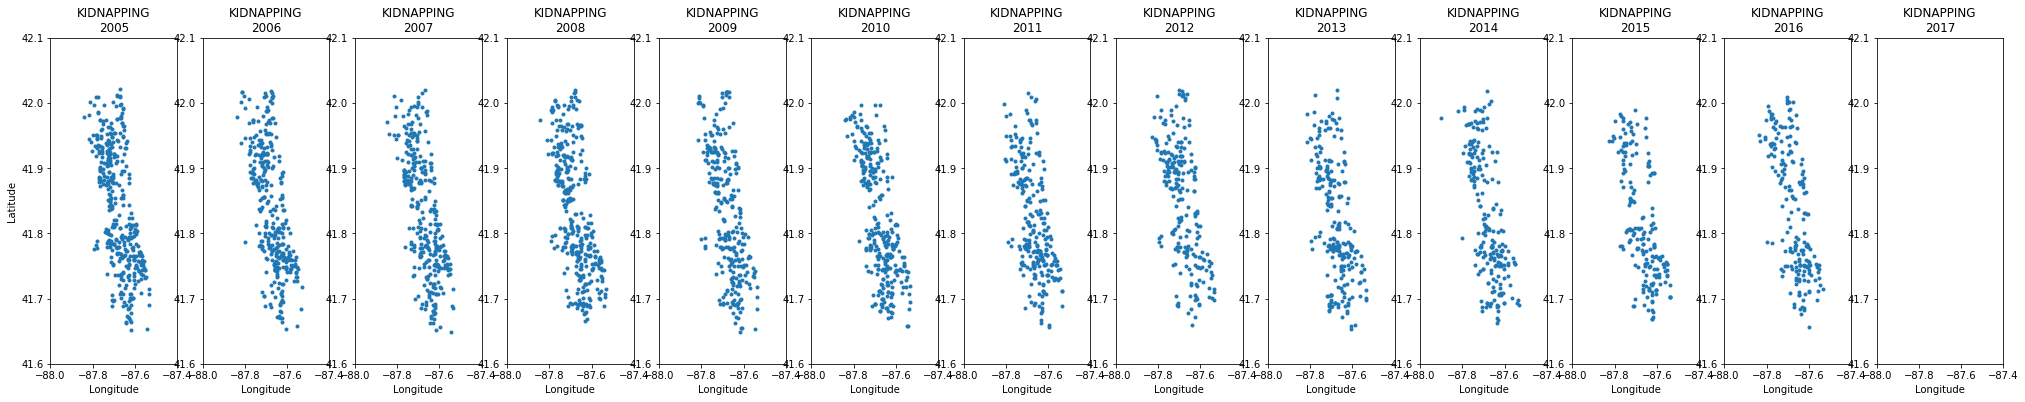

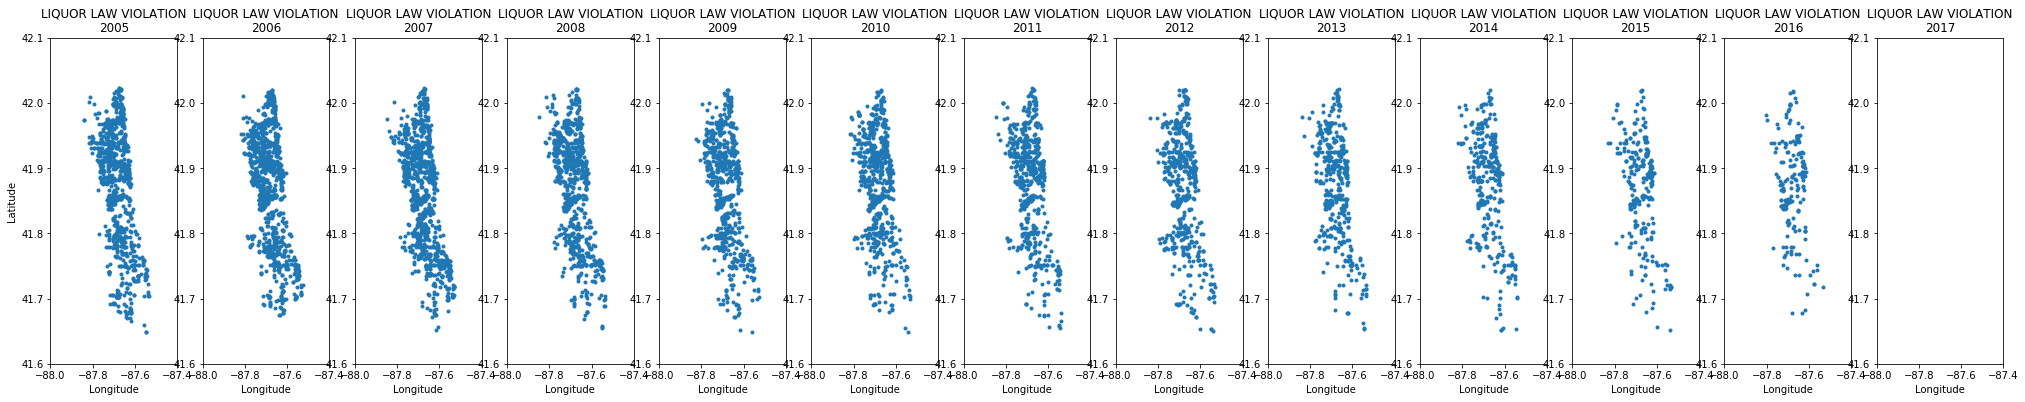

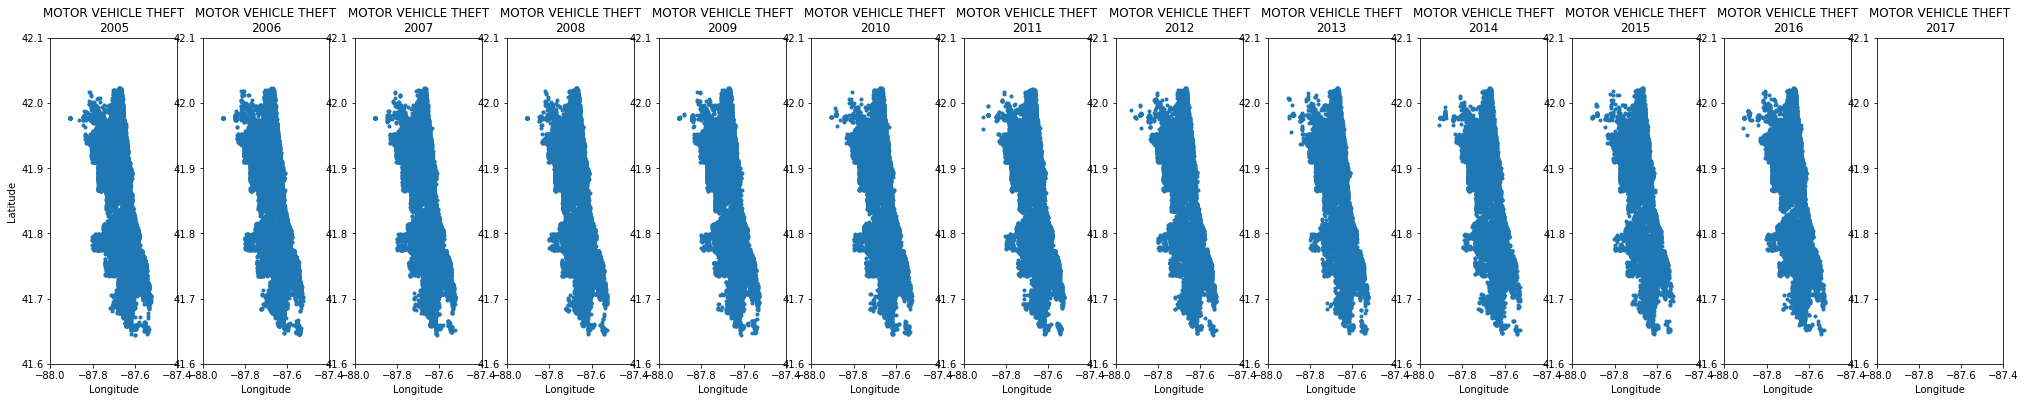

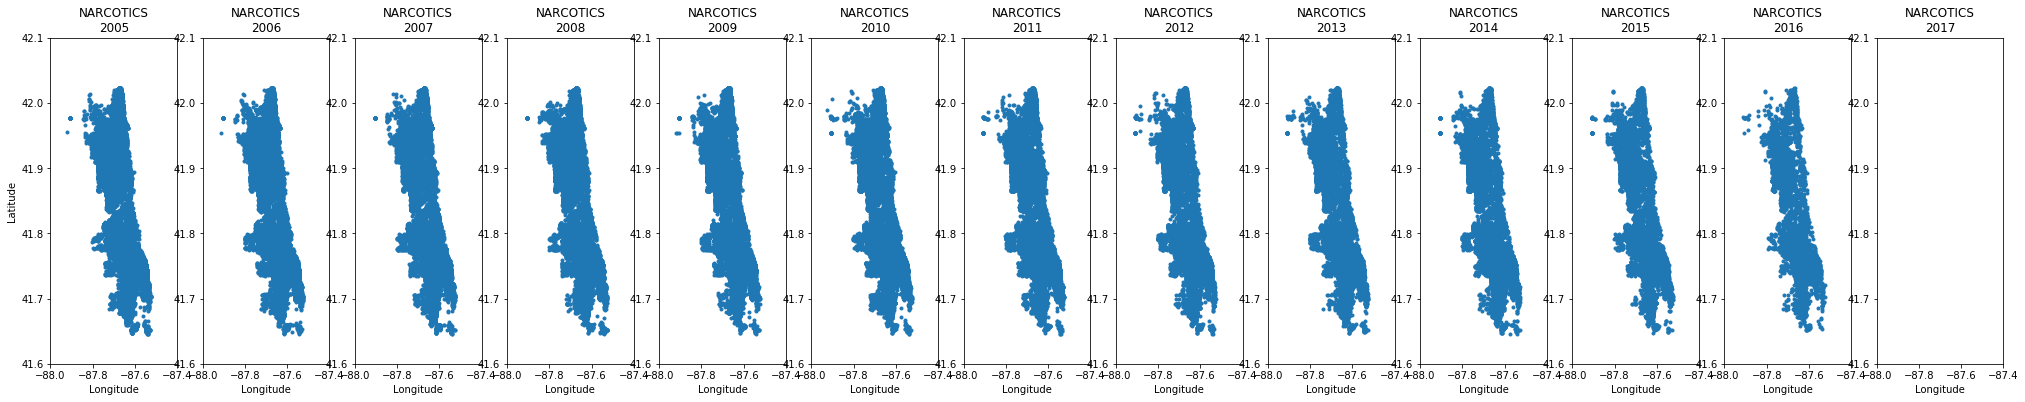

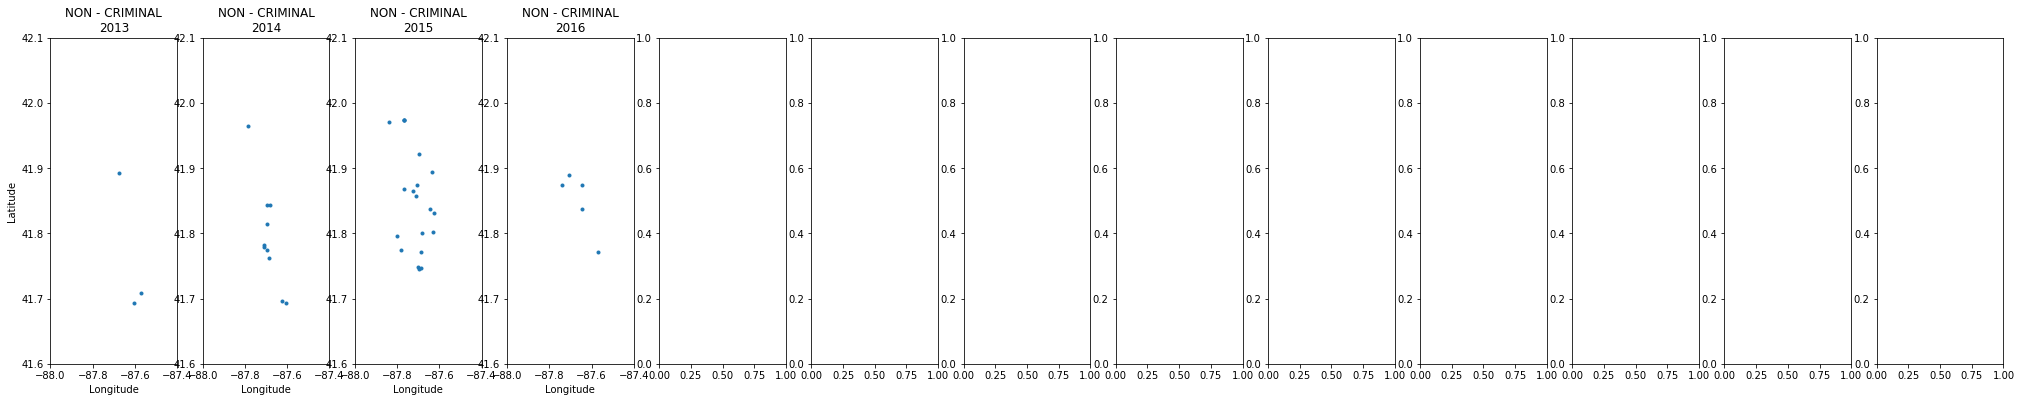

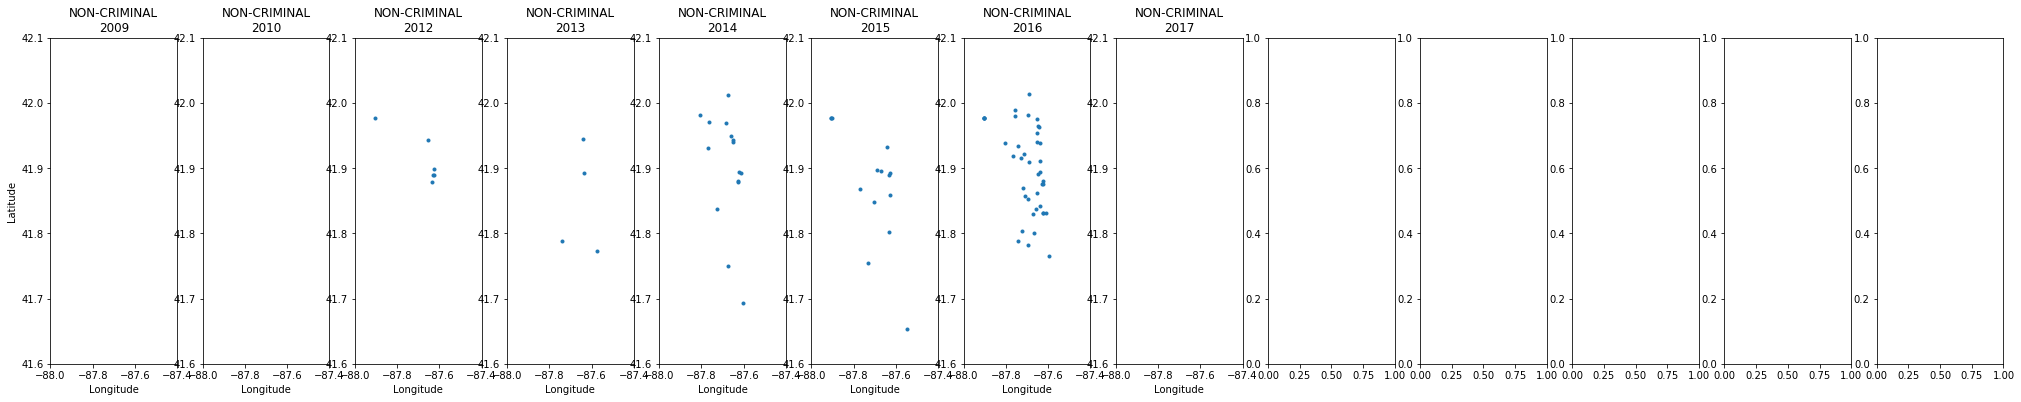

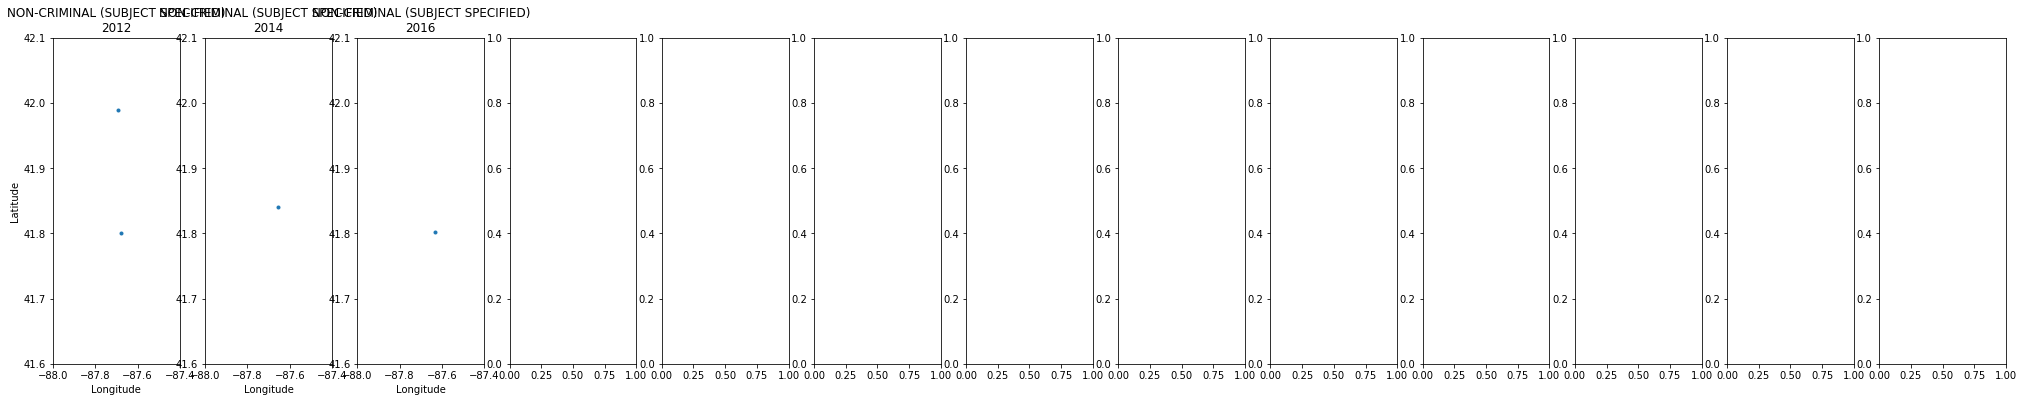

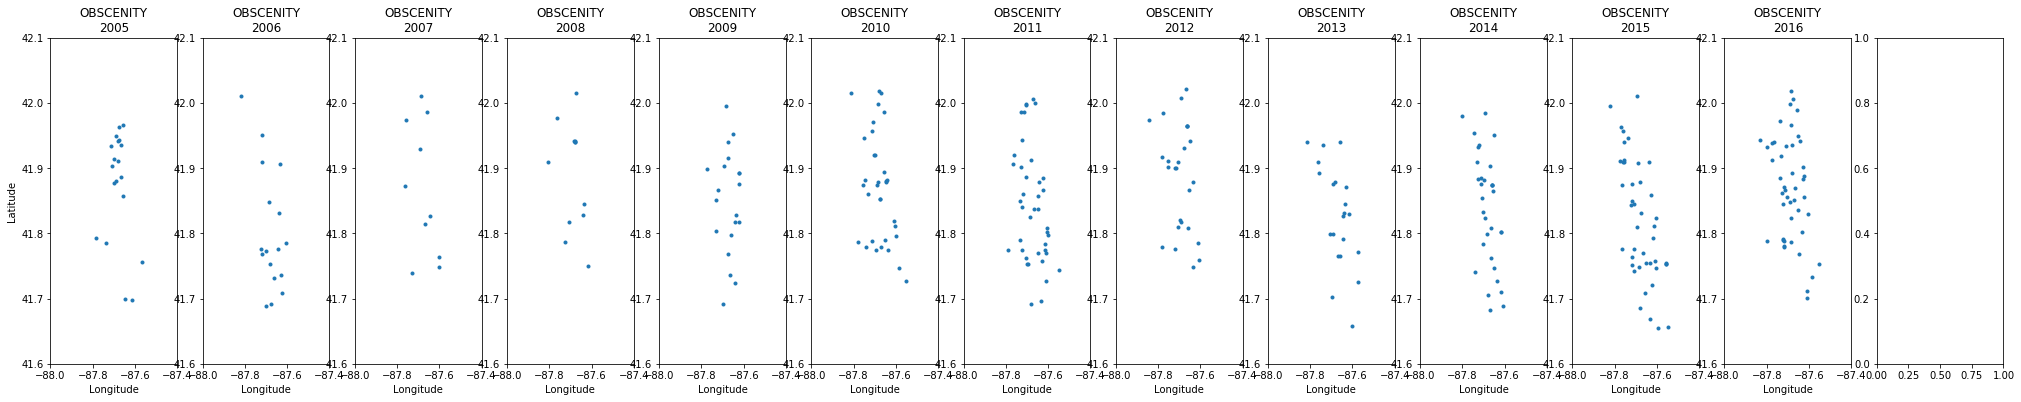

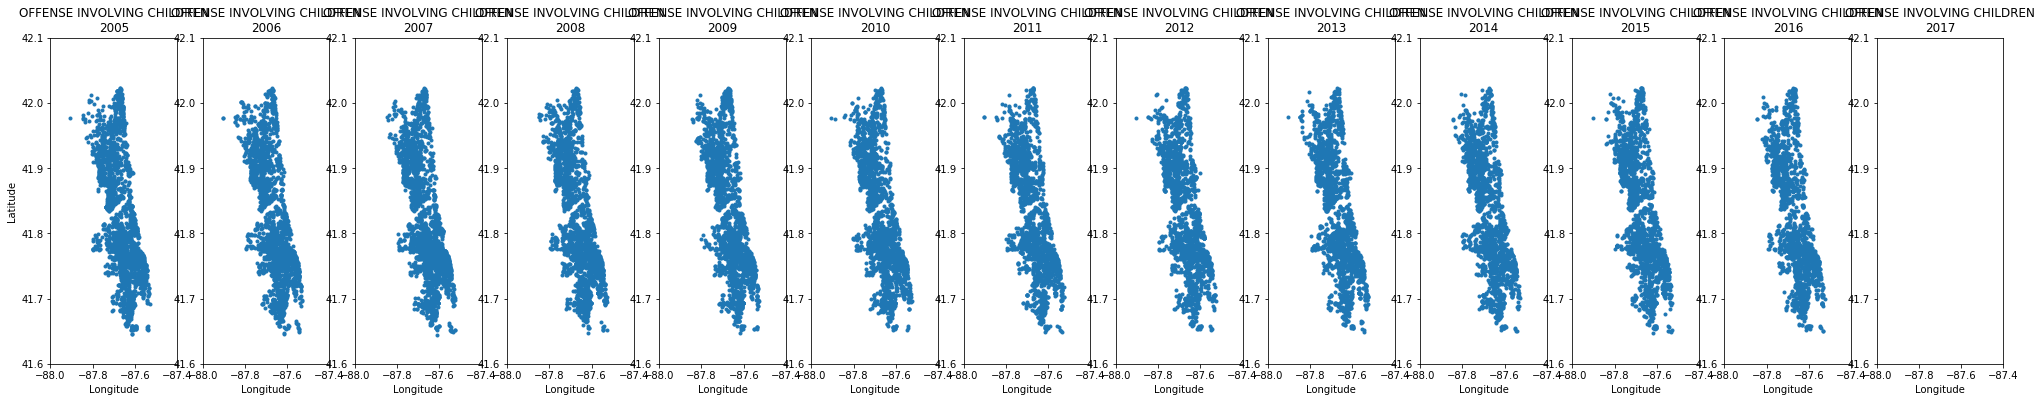

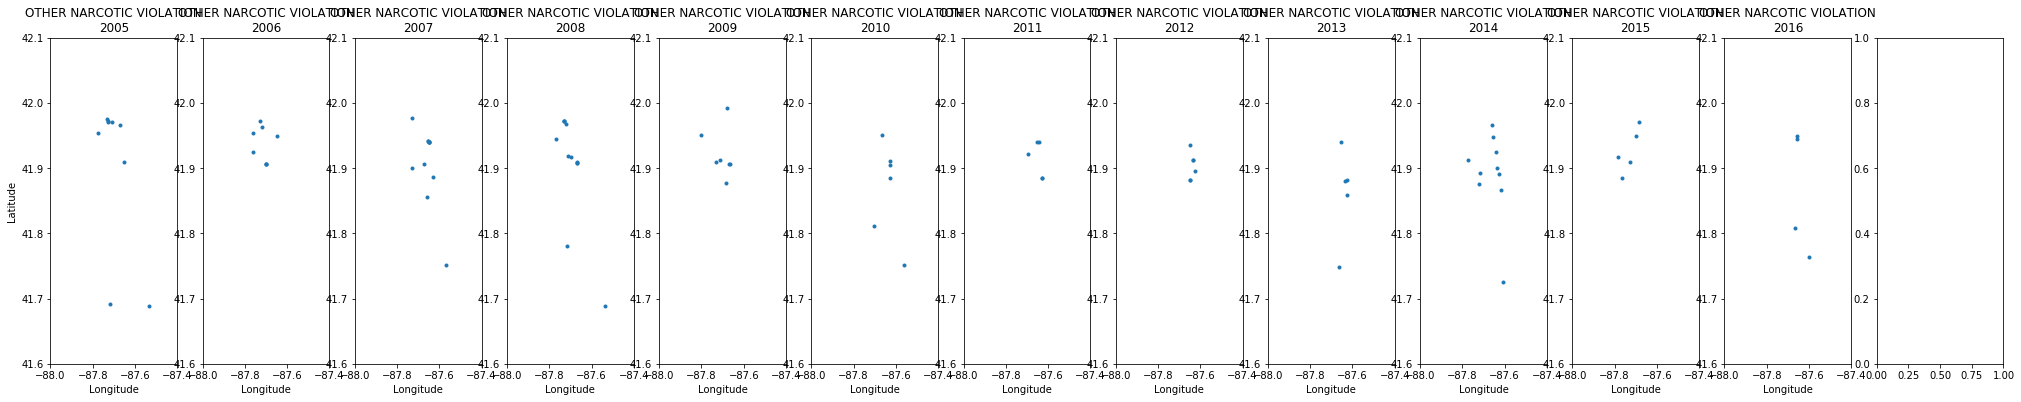

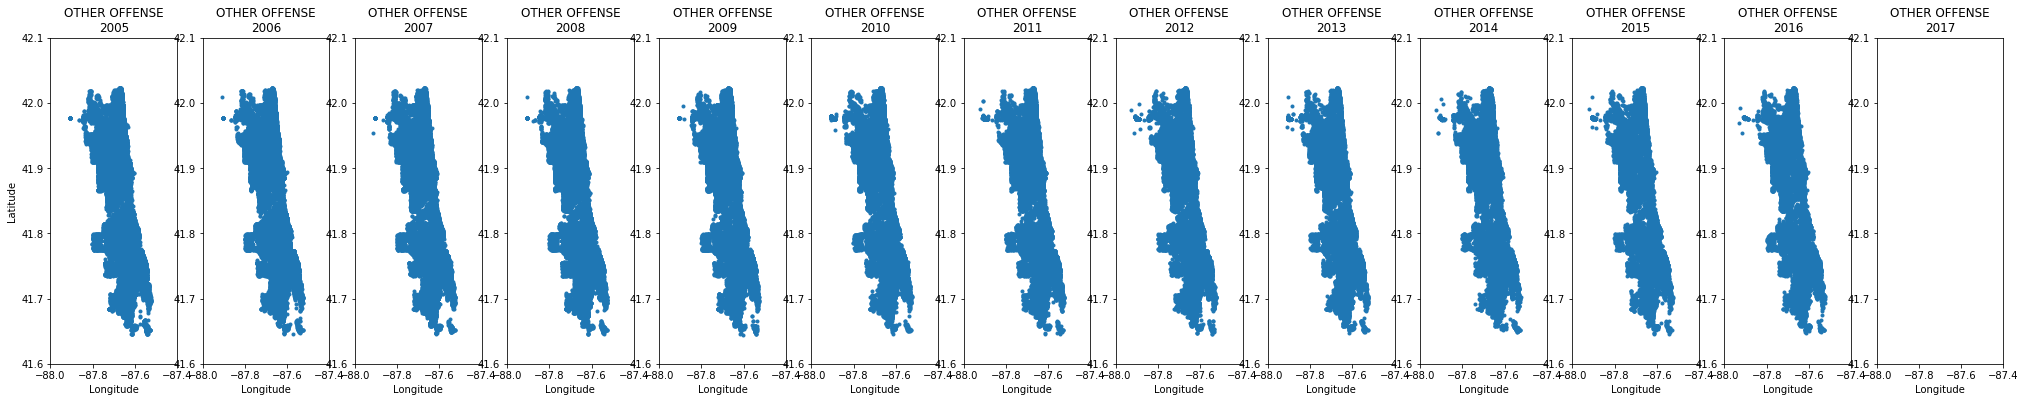

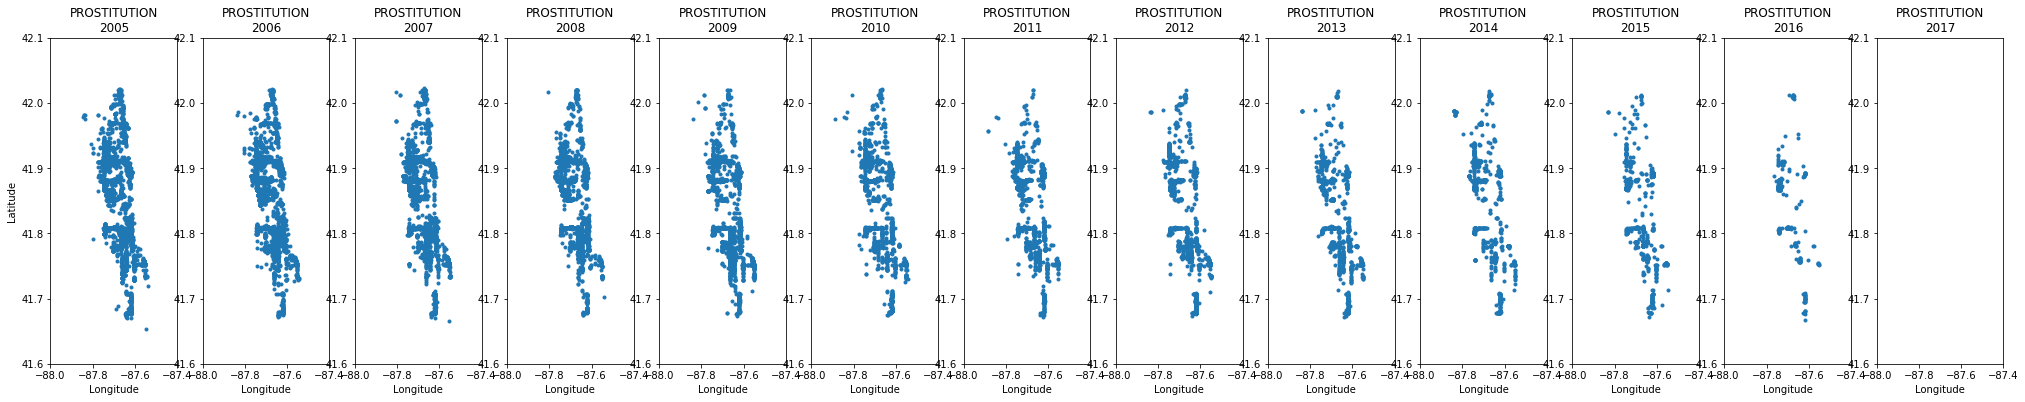

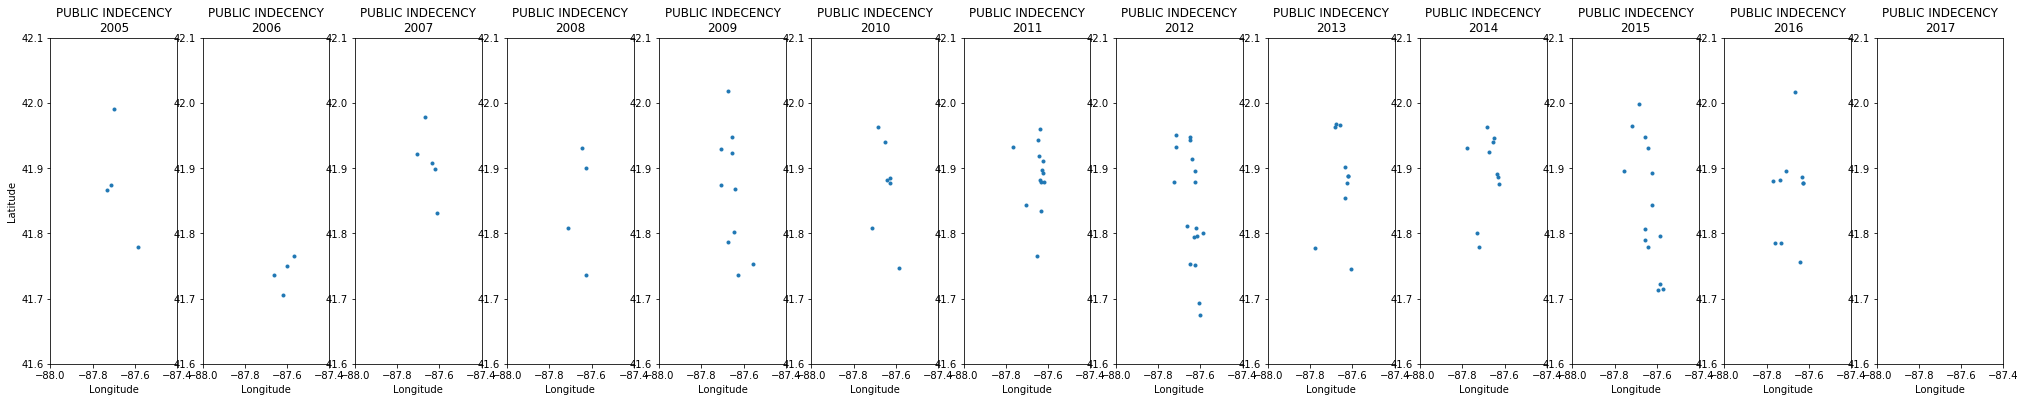

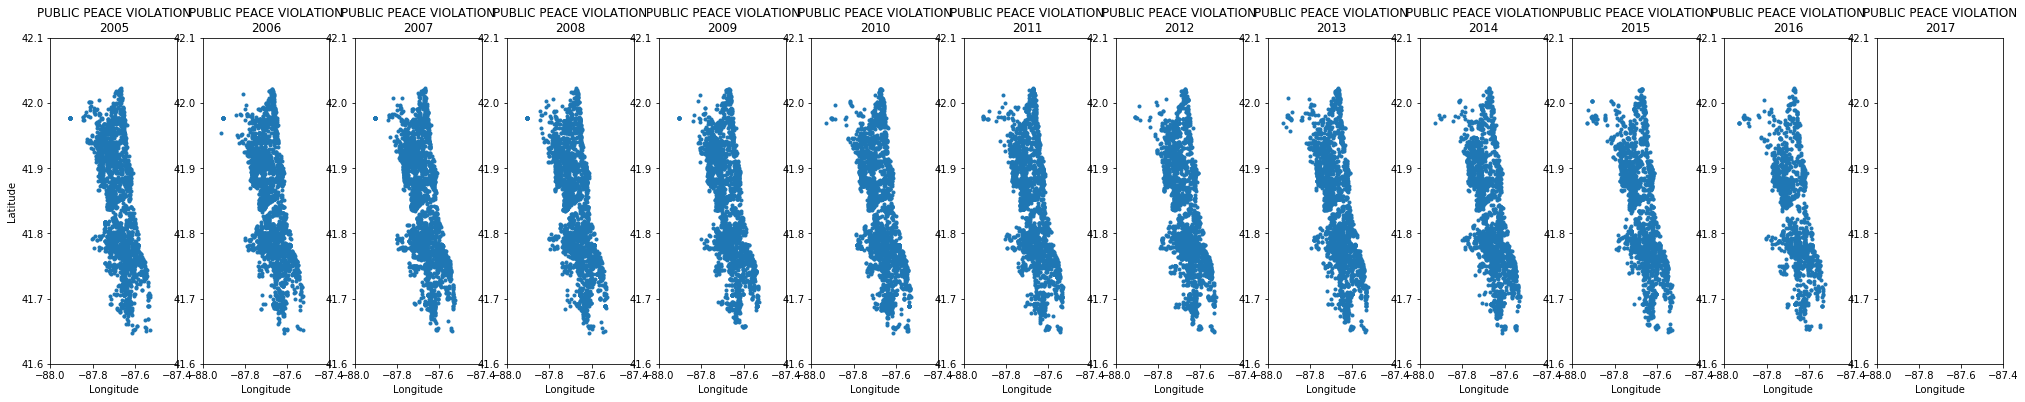

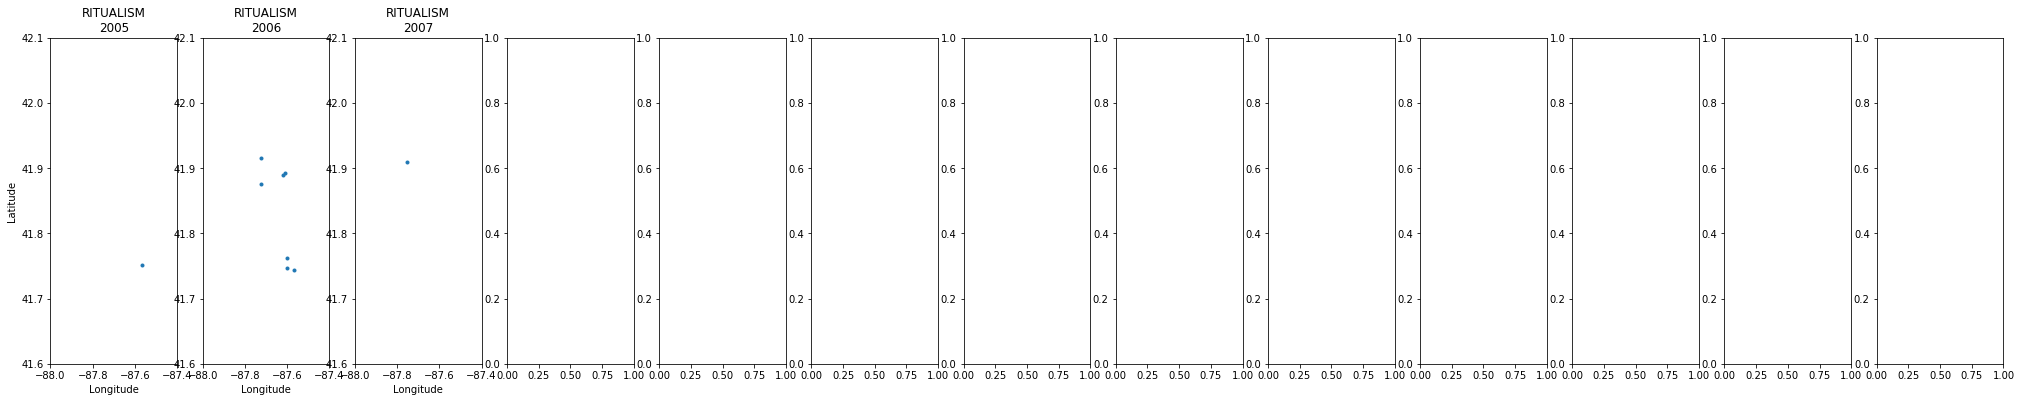

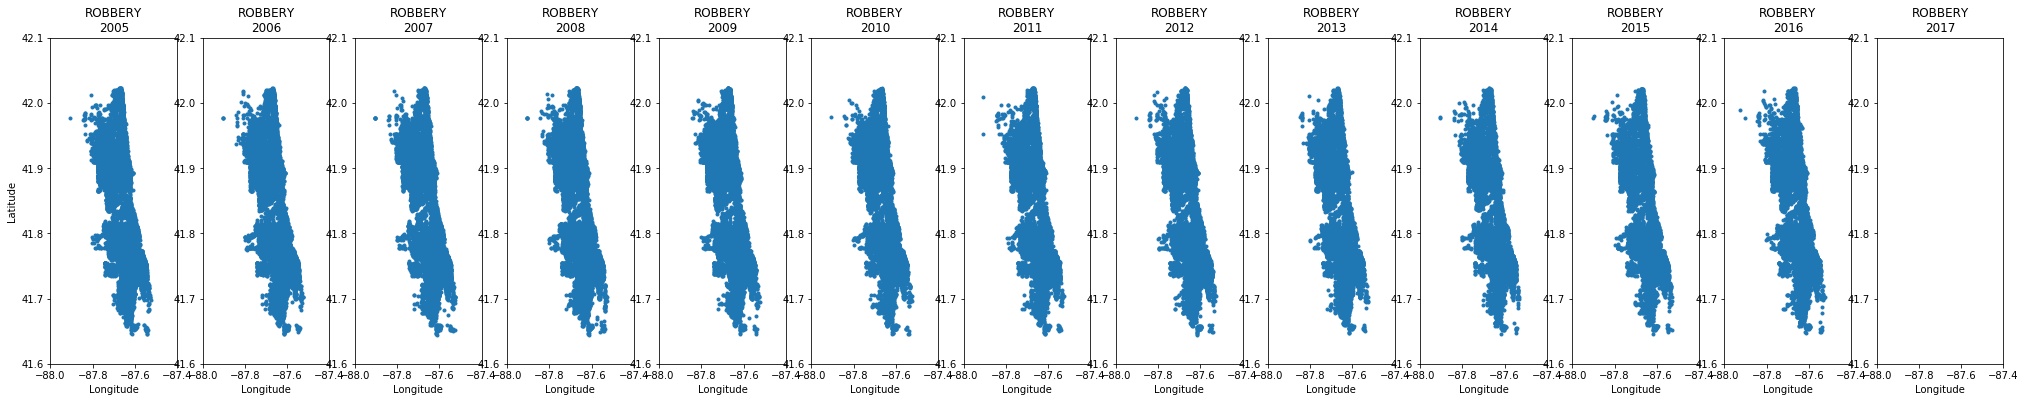

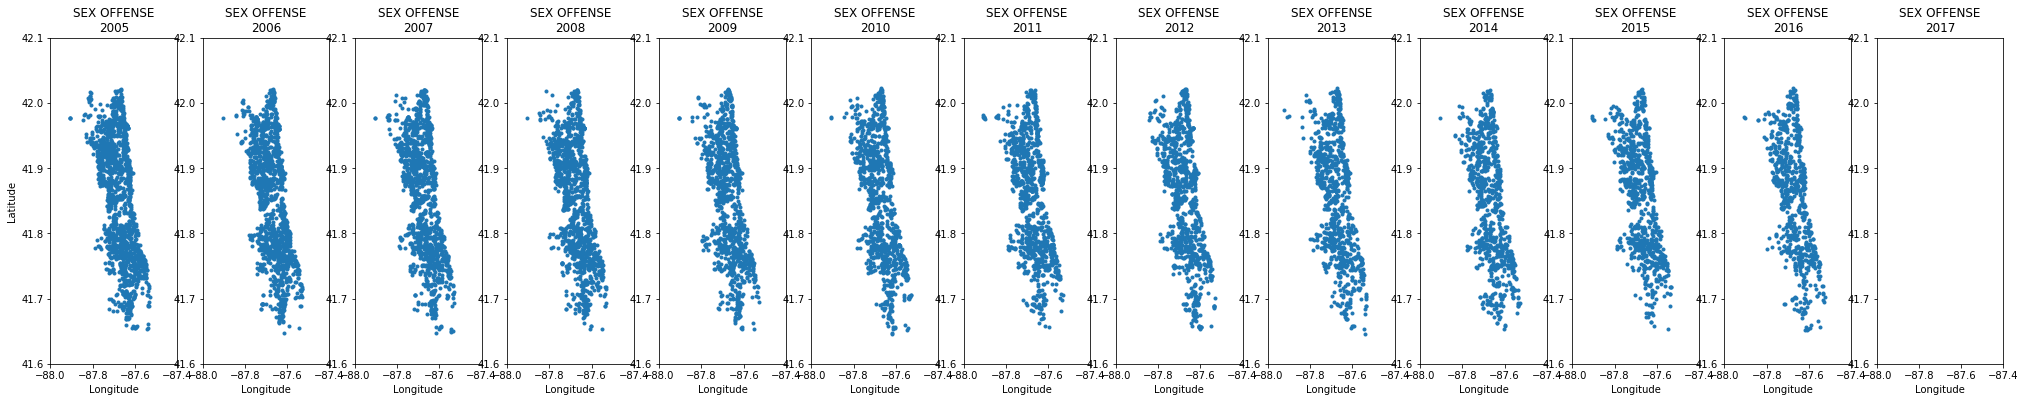

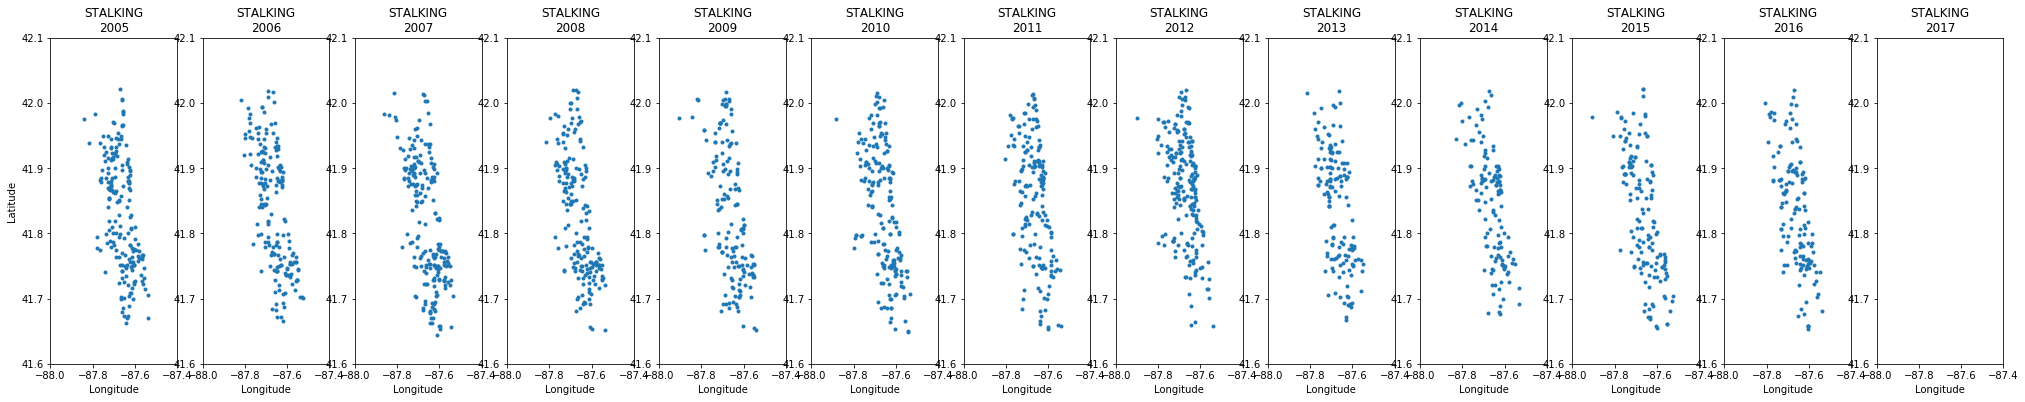

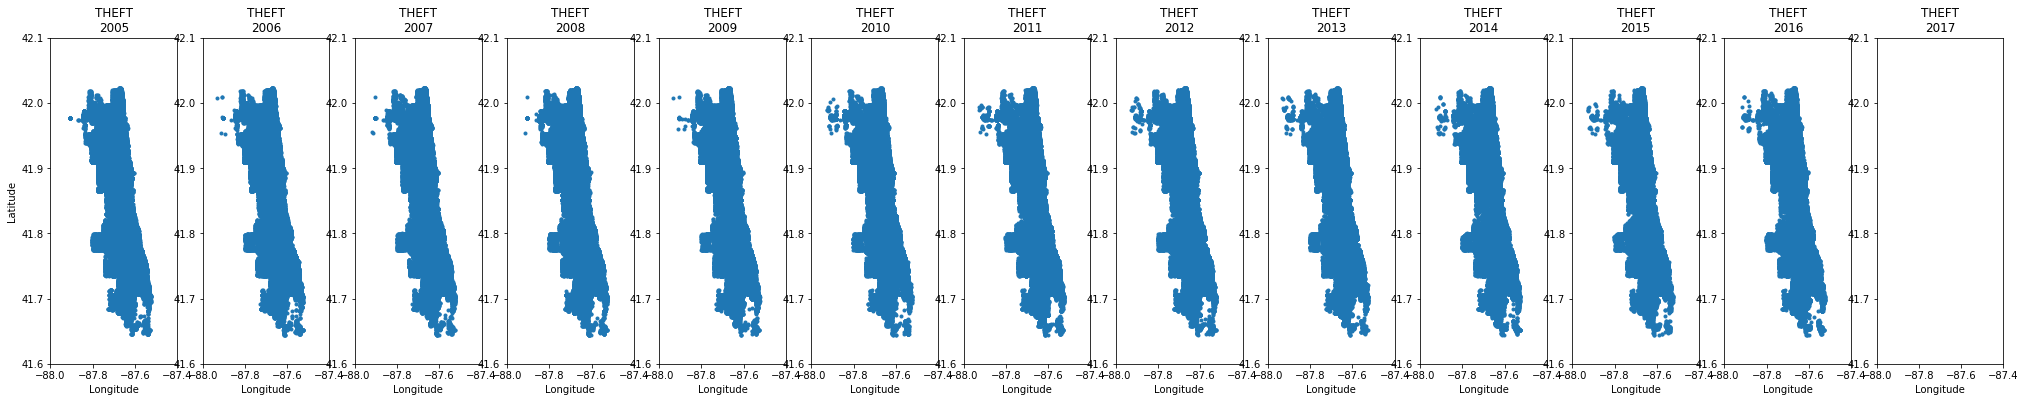

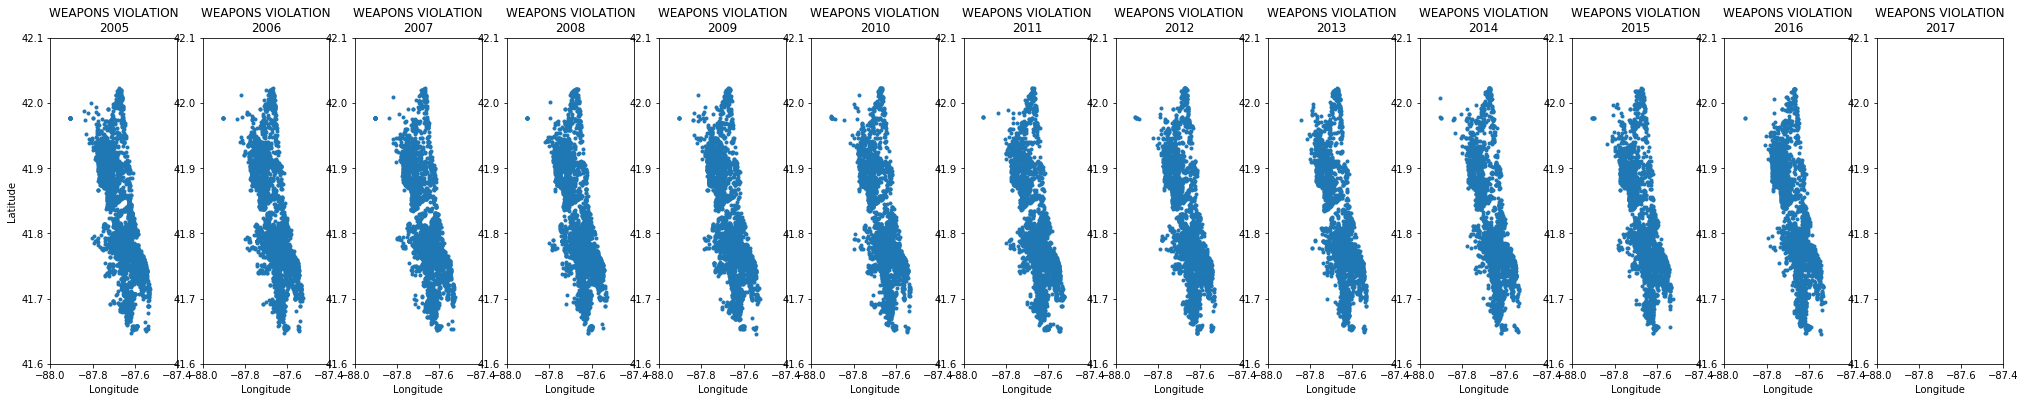

In [28]:
#look at patterns in crime movement across chicago
for key in Keys:
    i = 0
    Date_Groups = Groups[key].groupby(Groups[key].index.year)
    Date_Groups = dict(list(Date_Groups))
    Date_Keys = list(Date_Groups.keys())
    f, ax = plt.subplots(1,13)
    f.set_figheight(6)
    f.set_figwidth(35)
    for dkeys in Date_Keys:
        ax[i].scatter(Date_Groups[dkeys].Longitude, Date_Groups[dkeys].Latitude, marker = '.')
        ax[i].set_ylim(41.6,42.1) #coordinate span of chicago
        ax[i].set_xlim(-88,-87.4)
        f.subplots_adjust(hspace=2)
        s = key + "\n" + str(dkeys)
        ax[i].set_title(s)
        ax[0].set_ylabel('Latitude')
        ax[i].set_xlabel('Longitude')
        f.subplots_adjust(hspace = 2)
        i = i + 1
    plt.show()

In [29]:
Crime_Data_district = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['District'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ward = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Ward'], 
                                         index = Crime_Data.index.date, fill_value = 0)
Crime_Data_ca = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Community Area'], 
                                         index = Crime_Data.index.date, fill_value = 0)

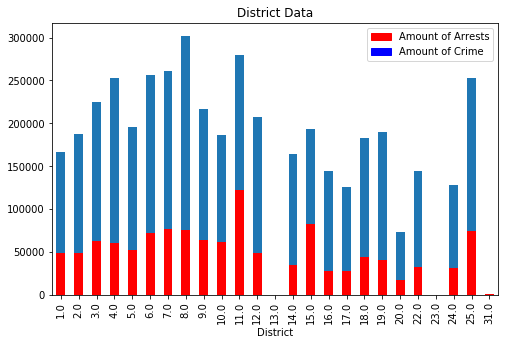

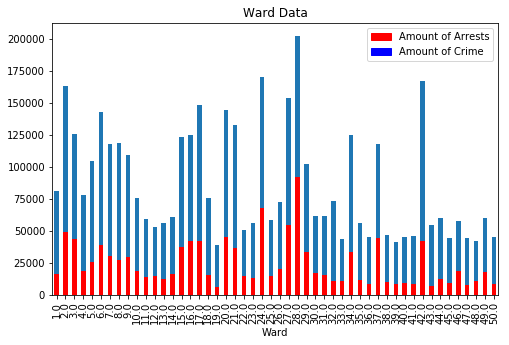

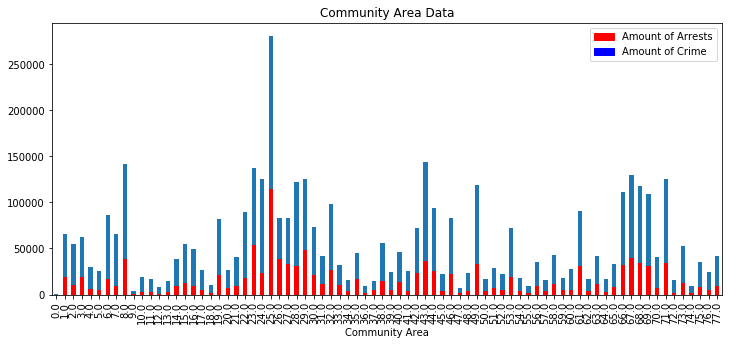

In [30]:
import matplotlib.patches as mpatches
red = mpatches.Patch(color='red', label='Amount of Arrests')
blue = mpatches.Patch(color='blue', label='Amount of Crime')


#crime per district
plt.figure(figsize = (8,5))
#plt.hold(True)
Crime_Data.groupby(Crime_Data['District']).size().plot(kind = 'bar')
Crime_Data_district.sum().plot(kind = 'bar', color = 'r')
plt.title('District Data')
plt.legend(handles=[red, blue])
#plt.hold(False)
#crime per ward
plt.figure(figsize = (8,5))
#plt.hold(True)
Crime_Data.groupby(Crime_Data['Ward']).size().plot(kind = 'bar')
Crime_Data_ward.sum().plot(kind = 'bar', color = 'r')
plt.title('Ward Data')
plt.legend(handles=[red, blue])
#plt.hold(False)
#crime per Community Area
plt.figure(figsize = (12,5))
#plt.hold(True)
Crime_Data.groupby(Crime_Data['Community Area']).size().plot(kind = 'bar')
Crime_Data_ca.sum().plot(kind = 'bar', color = 'r')
plt.title('Community Area Data')
plt.legend(handles=[red, blue])
#plt.hold(False)
plt.show()

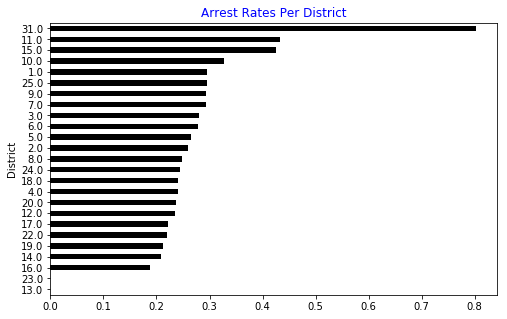

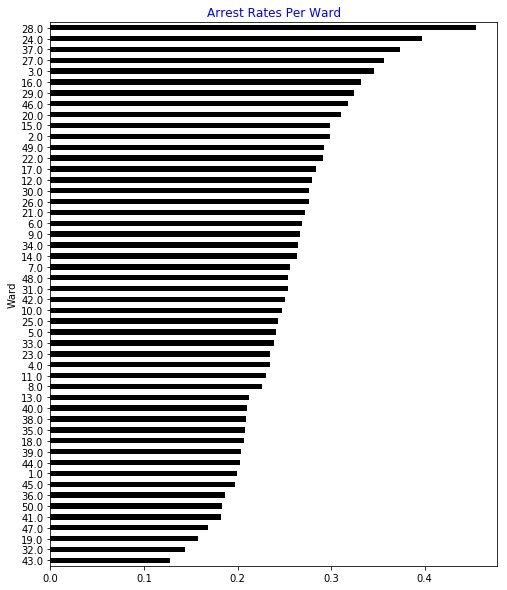

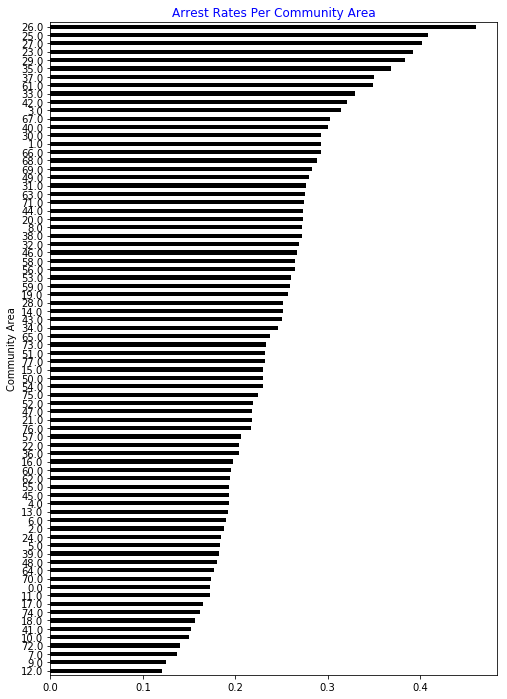

In [31]:
#Arrest rates per community area, ward, and district
A_R_D = Crime_Data_district.sum() / Crime_Data.groupby(Crime_Data['District']).size()
A_R_W = Crime_Data_ward.sum() / Crime_Data.groupby(Crime_Data['Ward']).size()
A_R_CA = Crime_Data_ca.sum() / Crime_Data.groupby(Crime_Data['Community Area']).size()

plt.figure(figsize = (8,5))
A_R_D.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per District', color = 'b')
plt.figure(figsize = (8,10))
A_R_W.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Ward', color = 'b')
plt.figure(figsize=(8,12))
A_R_CA.sort_values().plot(kind = 'barh', color = 'k')
plt.title('Arrest Rates Per Community Area', color = 'b')
plt.show()

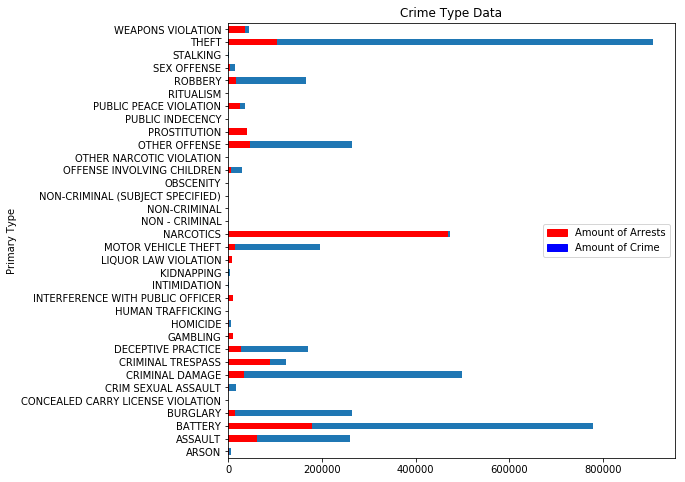

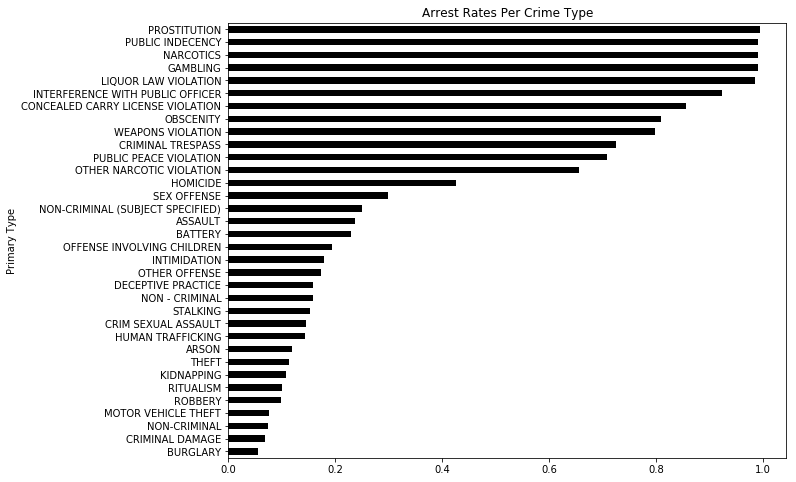

In [32]:
#Arrest rates per crime type
Crime_Data_Type = Crime_Data.pivot_table('Arrest', aggfunc = np.sum, columns = ['Primary Type'], 
                                         index = Crime_Data.index.date, fill_value = 0)
#crime per district
plt.figure(figsize = (8,8))
#plt.hold(True)
Crime_Data.groupby(Crime_Data['Primary Type']).size().plot(kind = 'barh')
Crime_Data_Type.sum().plot(kind = 'barh', color = 'r')
plt.title('Crime Type Data')
plt.legend(handles=[red, blue])
#plt.hold(False)

plt.figure(figsize = (10,8))
A_R_PT = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()
A_R_PT.sort_values().plot(kind = 'barh', color = 'k') #horizontal bar graph
plt.title('Arrest Rates Per Crime Type')
plt.show()

In [33]:
A = Crime_Data_Type.sum() / Crime_Data.groupby(Crime_Data['Primary Type']).size()

In [34]:
mean_A = Crime_Data['Arrest'].sum() / Crime_Data.shape[0]

In [35]:
stderr_A = np.std(A) / (Crime_Data_Type.shape[1]) ** (1/2.0)

In [36]:
high_A = mean_A + 1.96 * stderr_A #confidence limit of mean
low_A = mean_A - 1.96 * stderr_A
print(A)
print("Average Arrest rate is 95% between (", low_A, ",", high_A, ")") 

Primary Type
ARSON                                0.119119
ASSAULT                              0.237929
BATTERY                              0.230050
BURGLARY                             0.055276
CONCEALED CARRY LICENSE VIOLATION    0.855556
CRIM SEXUAL ASSAULT                  0.145551
CRIMINAL DAMAGE                      0.068625
CRIMINAL TRESPASS                    0.724592
DECEPTIVE PRACTICE                   0.158602
GAMBLING                             0.990222
HOMICIDE                             0.425872
HUMAN TRAFFICKING                    0.142857
INTERFERENCE WITH PUBLIC OFFICER     0.924124
INTIMIDATION                         0.179143
KIDNAPPING                           0.107733
LIQUOR LAW VIOLATION                 0.985621
MOTOR VEHICLE THEFT                  0.077133
NARCOTICS                            0.990764
NON - CRIMINAL                       0.157895
NON-CRIMINAL                         0.073684
NON-CRIMINAL (SUBJECT SPECIFIED)     0.250000
OBSCENITY            

In [37]:
for i in range(len(A)):
    if (A[i] <= low_A or A[i] >= high_A):
        print(A.index[i], A[i])

ARSON 0.11911942098914355
BURGLARY 0.055276419962969836
CONCEALED CARRY LICENSE VIOLATION 0.8555555555555555
CRIM SEXUAL ASSAULT 0.14555145551455514
CRIMINAL DAMAGE 0.06862478124887371
CRIMINAL TRESPASS 0.7245918433719266
DECEPTIVE PRACTICE 0.1586021347463153
GAMBLING 0.9902217741935484
HOMICIDE 0.4258723404255319
HUMAN TRAFFICKING 0.14285714285714285
INTERFERENCE WITH PUBLIC OFFICER 0.9241238213840953
KIDNAPPING 0.1077331759149941
LIQUOR LAW VIOLATION 0.985621072982117
MOTOR VEHICLE THEFT 0.07713257860612589
NARCOTICS 0.9907638405200616
NON - CRIMINAL 0.15789473684210525
NON-CRIMINAL 0.07368421052631578
OBSCENITY 0.8093841642228738
OTHER NARCOTIC VIOLATION 0.6555555555555556
PROSTITUTION 0.9935891161789175
PUBLIC INDECENCY 0.9908256880733946
PUBLIC PEACE VIOLATION 0.7074340527577938
RITUALISM 0.1
ROBBERY 0.0988021603355158
STALKING 0.15237651444547995
THEFT 0.11385158691430454
WEAPONS VIOLATION 0.7978932172422349


In [38]:
A

Primary Type
ARSON                                0.119119
ASSAULT                              0.237929
BATTERY                              0.230050
BURGLARY                             0.055276
CONCEALED CARRY LICENSE VIOLATION    0.855556
CRIM SEXUAL ASSAULT                  0.145551
CRIMINAL DAMAGE                      0.068625
CRIMINAL TRESPASS                    0.724592
DECEPTIVE PRACTICE                   0.158602
GAMBLING                             0.990222
HOMICIDE                             0.425872
HUMAN TRAFFICKING                    0.142857
INTERFERENCE WITH PUBLIC OFFICER     0.924124
INTIMIDATION                         0.179143
KIDNAPPING                           0.107733
LIQUOR LAW VIOLATION                 0.985621
MOTOR VEHICLE THEFT                  0.077133
NARCOTICS                            0.990764
NON - CRIMINAL                       0.157895
NON-CRIMINAL                         0.073684
NON-CRIMINAL (SUBJECT SPECIFIED)     0.250000
OBSCENITY            